In [857]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.1, style = 'whitegrid', context= 'paper')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from itertools import product
import dash
from dash import dcc, html, Input, Output
import scipy as sp
from pybaselines import Baseline
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.special import expit
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.integrate import cumulative_trapezoid
import math
from scipy.signal import find_peaks
#from pybaselines import Baseline

#oadeji01
os.chdir('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\20250501')#\\fitted')\\20250609_fitted
#os.chdir('C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Han\\20210331E1\\selected data')

In [282]:
glass = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\glass_spec.csv')
#.value
g_mean = glass.iloc[:, 1:].mean()
#glass[glass['sample'] == 'GlassSlide'].iloc[:, 5:].mean()
#norm_g = (g_mean.values/np.max(g_mean.values))*1000

In [265]:
df = pd.read_csv('20250609.csv')#.iloc[:, 1:]

df.insert(0, 'exp', ['20250609']*len(df))

In [267]:
df = pd.concat([df.iloc[:, :5], df.loc[:, '752.673':'1735.36']], axis=1)

In [268]:
df

exp sample trt_time orient spectra_num  752.673  753.817   754.96  \
0    20250609   Ctrl   20mins   Orth          03  1258.21  1278.74  1287.94   
1    20250609   Ctrl   20mins   Orth          05  1242.87  1251.88  1260.12   
2    20250609   Ctrl   20mins   Orth          07  1259.45  1257.87  1259.38   
3    20250609   Ctrl   20mins   Orth          09  1204.28  1215.95  1226.23   
4    20250609   Ctrl   20mins   Orth          11  1205.19  1209.38  1217.14   
..        ...    ...      ...    ...         ...      ...      ...      ...   
200  20250609    Trt   60mins   Para          05  2324.13  2319.05  2314.09   
201  20250609    Trt   60mins   Para          07  2079.75  2078.68  2081.63   
202  20250609    Trt   60mins   Para          09  2064.03  2069.38  2067.67   
203  20250609    Trt   60mins   Para          11  3138.22  3132.32  3122.23   
204  20250609    Trt   60mins   Para          14  2089.69  2099.58  2109.00   

     756.103  757.245  ...   1727.45   1728.33   1729.21   1730.08   1730.96  \
0    1296.48  1303.36  ...   554.309   553.448   553.015   552.609   552.434   
1    1267.57  1274.27  ...   506.209   505.818   505.224   505.144   505.080   
2    1260.67  1266.10  ...   577.353   576.284   575.007   573.468   571.999   
3    1237.67  1247.64  ...   564.123   561.746   559.199   556.036   552.351   
4    1225.80  1235.90  ...   605.779   603.875   601.997   599.979   597.891   
..       ...      ...  ...       ...       ...       ...       ...       ...   
200  2309.53  2305.09  ...   921.094   918.096   915.202   912.319   909.278   
201  2082.00  2081.59  ...   867.167   864.023   861.202   859.454   858.168   
202  2064.47  2057.89  ...   836.039   834.634   833.497   832.516   831.915   
203  3114.24  3110.70  ...  1159.580  1158.230  1157.010  1155.850  1155.170   
204  2117.32  2123.64  ...   838.608   835.017   831.215   827.484   823.900   

      1731.84   1732.72    1733.6   1734.48   1735.36  
0     552.265   551.701   550.507   548.978   547.105  
1     504.823   504.535   503.833   502.293   500.176  
2     570.277   569.583   568.149   568.070   568.067  
3     548.716   545.042   541.816   539.316   538.506  
4     595.903   594.083   592.792   592.315   592.377  
..        ...       ...       ...       ...       ...  
200   906.159   902.986   899.867   896.771   892.444  
201   857.752   857.061   856.641   855.775   854.634  
202   831.280   830.936   831.507   835.522   834.424  
203  1154.510  1153.460  1151.300  1147.980  1145.300  
204   820.832   818.150   816.029   814.186   812.726  

[205 rows x 981 columns]

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_18372\1773784246.py:7: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


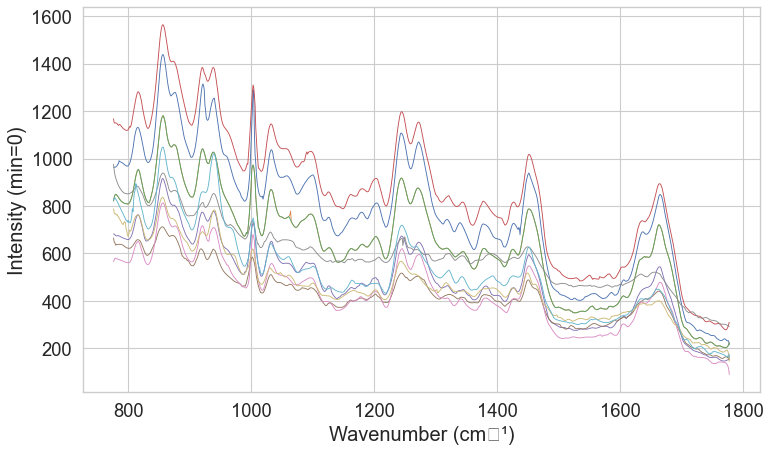

In [290]:
plt.figure(figsize=(10,6), dpi = 80)
for i in range(len(df_bl)):
    sns.lineplot(x=df_bl.columns[1:].astype(float), y=df_bl.iloc[i, 1:], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.show()

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_18372\4211093763.py:7: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


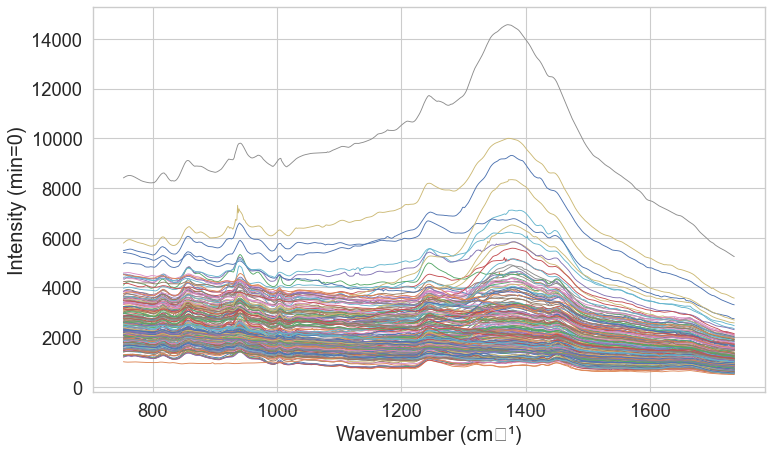

In [269]:
plt.figure(figsize=(10,6), dpi = 80)
for i in range(len(df)):
    sns.lineplot(x=df.columns[5:].astype(float), y=df.iloc[i, 5:], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.show()

In [291]:
interpolator = sp.interpolate.interp1d(g_mean[219:630].index.to_numpy(float), g_mean[219:630].values, kind = 'linear', bounds_error=False, fill_value = 0)
new_glass = interpolator(df.iloc[:, 5:].columns.to_numpy(float))

In [292]:
glass_region = (1300, 1450)  # Adjust to match your data

# --- Prepare data ---
wavenumbers = df.columns[5:].astype(float).to_numpy()
glass_ref = new_glass  # known glass reference spectrum (1D array)

# --- Select region corresponding to glass peak ---
glass_mask = (wavenumbers >= glass_region[0]) & (wavenumbers <= glass_region[1])
glass_ref_segment = glass_ref[glass_mask]

threshold_corr = 0.70      # correlation threshold
min_intensity_ratio = 0.23  # ignore weak glass signals
scaling_margin = 0.65       # scale glass to 95% of sample's max in the region

corrected_spectra = []
glass_contaminated_indices = []

for i in range(len(df)):
    y = df.iloc[i, 5:].astype(float).to_numpy()
    y_segment = y[glass_mask]

    # Step 1: Check correlation between signal and glass
    corr, _ = stats.pearsonr(y_segment, glass_ref_segment)

    # Step 2: Check intensity ratio
    max_y_segment = np.max(y_segment)
    max_glass_segment = np.max(glass_ref_segment)
    intensity_ratio = max_y_segment / (max_glass_segment + 1e-8)

    if corr > threshold_corr and intensity_ratio > min_intensity_ratio:
        # Step 3: Scale glass to be slightly lower than contaminated signal
        scale_factor = (max_y_segment / (max_glass_segment + 1e-8)) * scaling_margin
        scaled_glass = glass_ref * scale_factor

        # Step 4: Subtract glass signal
        corrected = y - scaled_glass
        corrected = np.clip(corrected, 0, None)  # ensure no negative values
        glass_contaminated_indices.append(i)
    else:
        corrected = y  # No subtraction if not contaminated

    corrected_spectra.append(corrected)

# --- Create DataFrame for corrected spectra ---
corrected_df = pd.DataFrame(corrected_spectra, columns=wavenumbers)

if glass_contaminated_indices:
    i = glass_contaminated_indices[0]
    plt.figure(dpi = 100)
    plt.plot(wavenumbers, df.iloc[i, 5:], label='Original')
    plt.plot(wavenumbers, corrected_df.iloc[i], label='Corrected')
    plt.plot(wavenumbers, glass_ref * scale_factor, label='Scaled Glass')
    plt.title(f"Spectrum {i} - Glass Correction")
    plt.legend()
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.show()


C:\Users\oadeji01\AppData\Local\Temp\ipykernel_18372\1466506084.py:7: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


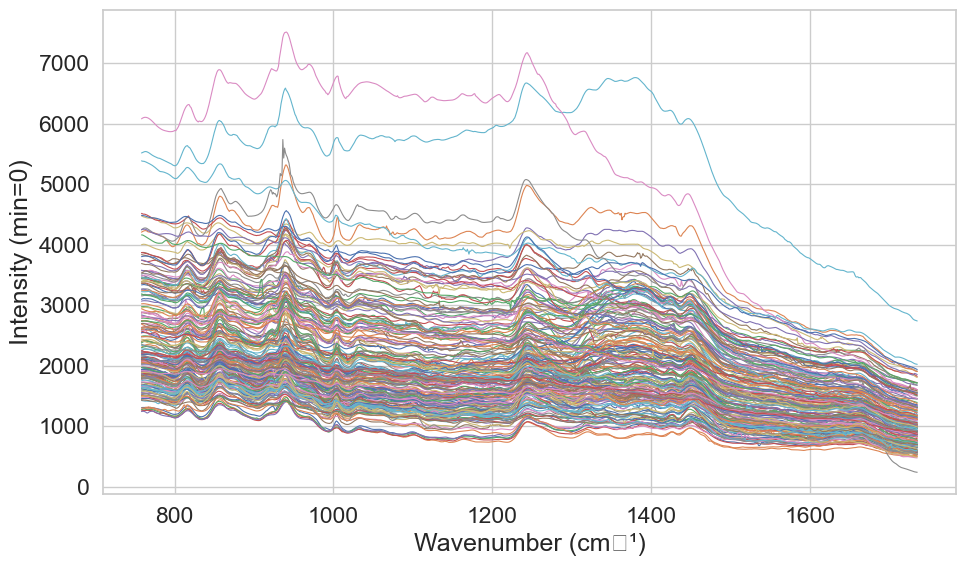

In [252]:
plt.figure(figsize=(10,6))
for i in range(len(corrected_df)):
    sns.lineplot(x=corrected_df.columns[5:].astype(float), y=corrected_df.iloc[i, 5:], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.show()

In [ ]:
## Import the raw txt files
## Deduct glass spectrum from the raw data
## If any area of the spectrum is negative, create an absolute value
## This is the new noise deducted spectra

#### Baseline

import numpy as np

def remove_bg(Dataspec, BGspec, x1, x2, wavenumber):
    """
    Replicates MATLAB RemoveBG function in Python.

    Parameters:
    - Dataspec : 2D numpy array (rows = spectra, columns = intensities)
    - BGspec   : 1D numpy array (background spectrum)
    - x1, x2   : int or float, anchor points (wavenumbers)
    - wavenumber : 1D numpy array, x-axis values (same length as BGspec)

    Returns:
    - datawobg : 2D numpy array, background-corrected spectra
    - normrat  : 1D numpy array, normalization ratios
    """
    # Ensure numpy arrays
    Dataspec = np.asarray(Dataspec)
    BGspec = np.asarray(BGspec)
    wavenumber = np.asarray(wavenumber)

    # --- Background section between x1 and x2 ---
    betxind = np.where((np.round(wavenumber) >= x1) & (np.round(wavenumber) <= x2))[0]
    betx = wavenumber[betxind]

    # Intensities at x1 and x2
    y1 = BGspec[np.where(np.round(wavenumber) == x1)[0][0]]
    y2 = BGspec[np.where(np.round(wavenumber) == x2)[0][0]]

    # Linear baseline for BGspec
    base = np.interp(betx, [x1, x2], [y1, y2])
    BGwobase = BGspec[betxind] - base
    BGwobase = BGwobase[1:-1]  # chop ends like MATLAB
    blarea = cumulative_trapezoid(BGwobase, betx[1:-1], initial=0)
    blnormarea = np.max(blarea) - np.min(blarea)

    datawobg = []
    normrat = []

    # --- Process each spectrum ---
    for i in range(Dataspec.shape[0]):
        y = Dataspec[i, :]  # now safe, it's a numpy array

        # Linear baseline for this spectrum
        y1 = y[np.where(np.round(wavenumber) == x1)[0][0]]
        y2 = y[np.where(np.round(wavenumber) == x2)[0][0]]
        ybase = np.interp(betx, [x1, x2], [y1, y2])

        datawobase = y[betxind] - ybase
        datawobase = datawobase[1:-1]  # chop ends
        bldataarea = cumulative_trapezoid(datawobase, betx[1:-1], initial=0)
        datanormarea = np.max(bldataarea) - np.min(bldataarea)

        ratio = datanormarea / blnormarea
        normrat.append(ratio)

        corrected = y - ratio * BGspec
        datawobg.append(corrected)

    return np.array(datawobg), np.array(normrat)




bl_data, _ = remove_bg(corrected_df, g_mean.values, 1300, 1400, corrected_df.columns)
bl_data = pd.DataFrame(bl_data, columns = df.columns[5:].astype(float))

plt.figure(figsize=(10,6))
for i in range(len(bl_data)):
    sns.lineplot(x=bl_data.columns.astype(float), y=bl_data.iloc[i, :], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.show()

In [59]:
# define baseline correction function
#adaptive iteratively reweighted penalized least-squares (airPLS)

def airPLS(y, λ=1e5, porder=5, itermax=50, tol=1e-3):
    m = y.size
    # build difference operator D (as before) …
    diags = np.zeros((porder+1, m))
    for k in range(porder+1):
        diags[k, k:m-porder+k] = [(-1)**k * math.comb(porder, k)] * (m-porder)
    D = sparse.diags(diags, np.arange(0, porder+1), shape=(m-porder, m))

    w = np.ones(m)
    W = sparse.spdiags(w, 0, m, m)
    for _ in range(itermax):
        Z = W + λ * (D.T @ D)
        z = spsolve(Z, w * y)

        d = y - z
        dn = d[d < 0]
        m_dn = dn.mean() if dn.size else 0
        s_dn = dn.std()  if dn.size else 1

        # stable sigmoid instead of raw exp
        arg = -2 * (d - (2*s_dn - m_dn)) / s_dn
        w_new = expit(arg)

        if np.linalg.norm(w_new - w) / np.linalg.norm(w) < tol:
            break
        w = w_new
        W = sparse.spdiags(w, 0, m, m)

    return z

In [293]:
def baseline_poly_with_anchors(df, degree, anchor_points, regions):
    # 1) get wavenumbers (x-axis)
    x_full = df.columns.astype(float).to_numpy()#.columns[4:]
    
    # 2) find candidate indices in union of regions
    mask = np.zeros_like(x_full, dtype=bool)
    for low, high in regions:
        mask |= (x_full >= low) & (x_full <= high)
    cand_idx = np.where(mask)[0]
    if cand_idx.size < anchor_points:
        raise ValueError(f"only {cand_idx.size} points in regions but need {anchor_points}")
    
    # 3) pick exactly `anchor_points` evenly from candidates
    pick_idx = cand_idx[np.linspace(0, cand_idx.size-1, anchor_points, dtype=int)]
    x_anchors = x_full[pick_idx]
    
    corrected_list = []
    for _, row in df.iterrows():
        #print(row)
        y = row.iloc[:].astype(float).to_numpy()#
        y_anchors = y[pick_idx]
        
        # 4) fit and subtract
        coeffs = np.polyfit(x_anchors, y_anchors, degree)
        baseline = np.polyval(coeffs, x_full)
        y_corr = y - baseline
        
        # 5) shift minimum to zero
        y_corr -= y_corr.min()
        corrected_list.append(y_corr)
    
    # assemble result
    corrected_df = pd.DataFrame(
        corrected_list,
        index=df.index,
        columns=x_full
    )
    return corrected_df


In [296]:
df_bl

sample    775.67   776.807   777.944   779.081  \
0       20s_50x_2_spikeremoved   963.429   963.429   963.429   963.429   
2                    20s_50x_3   820.840   836.675   845.586   849.050   
3       20s_50x_3_spikeremoved   820.840   836.675   845.586   849.050   
5         20s_50x_spikeremoved  1167.700  1150.650  1149.860  1150.150   
7                     2min_50x   681.750   681.428   678.491   674.555   
8                   2min_50x_2   664.961   647.195   643.703   634.464   
10                  2min_50x_3   565.007   572.806   579.483   579.078   
13               control_50x_4   975.885   948.924   931.162   918.714   
15  control_50x_5_spikeremoved   787.901   770.210   765.629   767.235   
17  control_50x_6_spikeremoved   824.858   832.381   833.658   830.545   

     780.217   781.353   782.488   783.624   784.759  ...  1769.95  1770.81  \
0    966.631   969.323   976.237   976.892   990.568  ...  239.177  238.293   
2    847.387   844.450   840.715   836.296   831.716  ...  202.411  201.962   
3    847.387   844.450   840.715   836.296   831.716  ...  202.411  201.962   
5   1149.630  1147.050  1142.960  1139.520  1142.460  ...  279.719  278.349   
7    673.406   673.633   675.022   674.383   673.313  ...  145.677  146.066   
8    636.802   637.715   638.014   637.892   637.969  ...  161.206  162.561   
10   578.168   576.904   575.285   574.488   573.295  ...  139.868  139.291   
13   909.422   901.295   893.923   886.904   880.989  ...  300.787  300.534   
15   761.471   764.115   758.112   753.808   748.322  ...  184.824  186.711   
17   825.519   819.835   814.410   808.217   801.679  ...  170.745  169.291   

    1771.68  1772.55  1773.41  1774.28  1775.14  1776.01  1776.88   1777.74  
0   237.214  235.406  232.355  230.290  231.334  231.751  226.964  214.1610  
2   201.880  202.209  203.367  205.057  207.286  211.365  216.413  222.4000  
3   201.880  202.209  203.367  205.057  207.286  211.365  216.413  222.4000  
5   277.470  277.573  279.180  282.350  287.185  293.763  302.847  308.9850  
7   146.672  147.406  148.372  149.547  150.979  152.040  154.222  168.5120  
8   163.468  163.689  162.726  161.804  159.938  157.251  150.822  155.9060  
10  138.053  136.639  134.270  130.681  126.136  119.219  108.110   88.7988  
13  299.686  299.012  298.111  296.602  295.186  293.304  291.649  290.5240  
15  189.227  191.487  191.971  192.016  188.600  181.722  167.187  144.6560  
17  167.769  165.865  164.186  164.380  167.364  164.622  162.875  174.6810  

[10 rows x 1006 columns]

In [297]:
# ——— Example usage ———
# assume you’ve already loaded your DataFrame `df`
degree        = 5
anchor_points = 159
regions       = [(750, 752), (777, 784), (795, 805), (1009, 1020), (1110, 1120), (1143, 1156), (1215, 1226), (1500,1607), (1694,1730)]

#corrected = baseline_poly_with_anchors(corrected_df, degree, anchor_points, regions) #.iloc[:, 5:]
corrected = baseline_poly_with_anchors(df_bl.iloc[:, 1:], degree, anchor_points, regions)

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_18372\3297824288.py:8: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


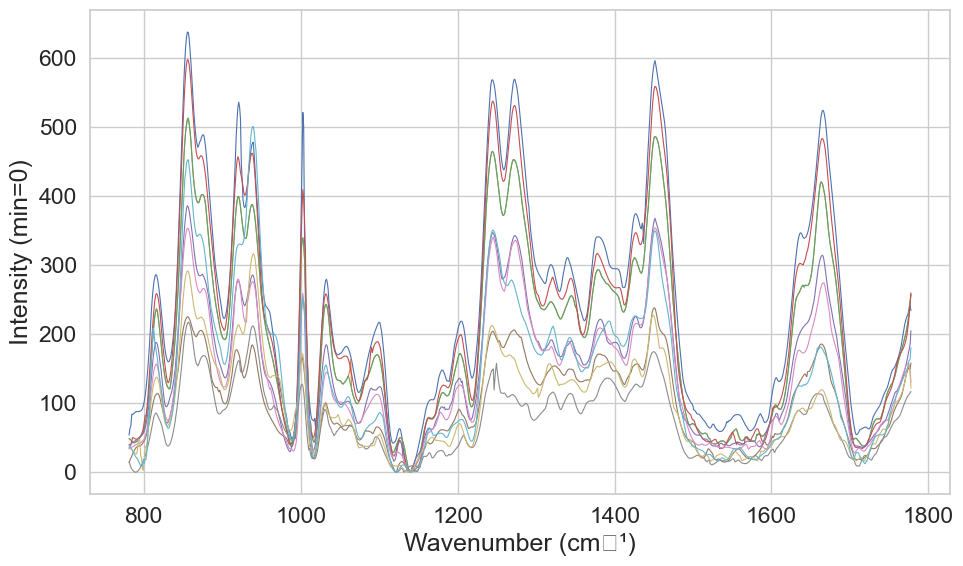

In [298]:
# quick plot of first 3 corrected spectra
plt.figure(figsize=(10,6))
for i in range(len(corrected)):
    sns.lineplot(x=corrected.columns[5:].astype(float), y=corrected.iloc[i, 5:], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.show()

In [300]:
corrected

775.670    776.807    777.944    779.081    780.217    781.353   \
0   32.308132  35.531225  38.702973  41.823927  48.093956  53.804369   
2    7.849052  27.179025  39.532015  46.385563  48.057294  48.403750   
3    7.849052  27.179025  39.532015  46.385563  48.057294  48.403750   
5   43.351446  29.955535  32.767276  36.607213  39.582828  40.447801   
7   29.335135  31.794357  31.600446  30.369786  31.886430  34.742154   
8   25.004857  10.587645  10.402687   4.429368   9.989253  14.083612   
10  11.017452  21.027167  29.882647  31.624233  32.827418  33.645439   
13  71.622123  48.309726  34.158888  25.284915  19.527015  14.897651   
15  39.125507  25.759473  25.453375  31.284643  29.693053  36.460766   
17  22.581524  34.500756  40.121812  41.301157  40.512544  39.015226   

     782.488    783.624    784.759    785.893   ...    1769.950    1770.810  \
0   63.685114  67.260955  83.807283  83.342751  ...  214.368013  218.191782   
2   47.898636  46.662174  45.212285  43.412620  ...  194.282520  198.399597   
3   47.898636  46.662174  45.212285  43.412620  ...  194.282520  198.399597   
5   39.749697  39.655020  45.888406  50.220503  ...  185.079776  188.502834   
7   38.721070  40.638117  42.086169  43.412688  ...  147.975346  151.948121   
8   17.521075  20.500550  23.636947  26.611742  ...  131.264267  136.041192   
10  34.075837  35.299555  36.095365  36.743672  ...  149.433335  152.194036   
13  10.984091   7.390727   4.862825   2.872774  ...  100.874130  103.425576   
15  34.529638  34.253262  32.743965  31.414284  ...  129.938598  135.214645   
17  37.723040  35.616719  33.112518  30.208013  ...  142.053584  144.225675   

      1771.680    1772.550    1773.410    1774.280    1775.140    1776.010  \
0   221.924331  224.977526  226.780963  229.676862  235.674501  241.153412   
2   202.984231  208.027917  213.893945  220.395116  227.428140  236.416051   
3   202.984231  208.027917  213.893945  220.395116  227.428140  236.416051   
5   192.520581  197.568874  204.112351  212.325128  222.193593  233.913121   
7   156.215964  160.648647  165.307254  170.254893  175.453068  180.361600   
8   140.444029  144.195399  146.756344  149.434032  151.160925  152.143798   
10  154.366724  156.398006  157.468900  157.394624  156.358593  153.026634   
13  105.439340  107.652107  109.629417  111.057358  112.569565  113.675289   
15  141.192473  146.948081  150.920920  154.529340  154.669633  151.423719   
17  146.408365  148.245936  150.301984  154.311605  161.104318  162.252936   

      1776.880    1777.740  
0   241.479619  233.781796  
2   246.422593  257.360230  
3   246.422593  257.360230  
5   248.188792  259.508388  
7   186.429151  204.597642  
8   149.420294  158.202427  
10  145.538368  129.841586  
13  115.033782  116.913116  
15  140.555664  121.683933  
17  164.434631  180.161829  

[10 rows x 1005 columns]

In [275]:
bc_df = pd.concat([df.iloc[:, :5], corrected], axis=1)
bc_df.to_csv('20250609_blc.csv', index=False)

In [309]:
df_bl.shape, corrected.shape

((10, 1006), (10, 1005))

In [276]:
smoothed_list = []
for x in range(len(bc_df.iloc[:, 5:])):
    smoothed_list.append(sp.signal.savgol_filter(x= bc_df.iloc[x, 5:], window_length=15, polyorder=3))

smoothed_df = pd.DataFrame(smoothed_list, columns=bc_df.iloc[:, 5:].columns)
smoothed_df = pd.concat([df.iloc[:, :5], smoothed_df], axis=1)

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_18372\374843559.py:7: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


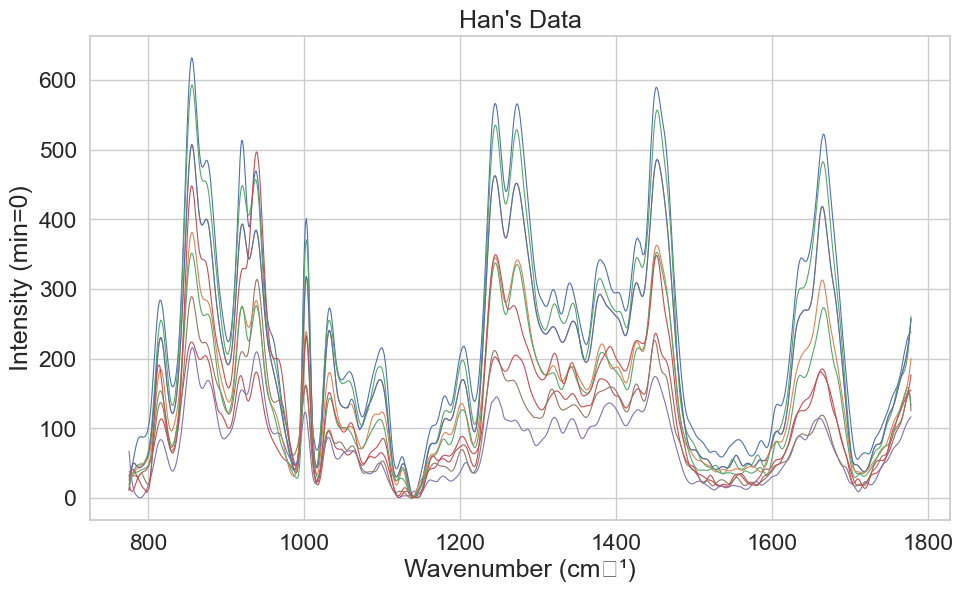

In [303]:
plt.figure(figsize=(10,6))
for i in range(len(smoothed_df)):
    sns.lineplot(x=smoothed_df.columns[5:].astype(float), y=smoothed_df.iloc[i, 5:], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.title("Han's Data")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
for i in range(len(smoothed_df)):
    sns.lineplot(x=smoothed_df.columns[1:].astype(float), y=smoothed_df.iloc[i, 1:], lw=0.8)
plt.xlabel("Wavenumber (cm\u207B\u00B9)")
plt.ylabel("Intensity (min=0)")
#plt.title(f"{degree}ᵗʰ‑order baseline, {anchor_points} anchors")
plt.tight_layout()
plt.title("Han's Data")
plt.show()

In [278]:
smoothed_df.to_csv('20250609_smoothed.csv')

In [304]:
#smoothed_df.iloc[:, 6]/
smoothed_df.iloc[:, 675].max()

np.float64(310.8965792657275)

#### Normalize Step

In [396]:
# Normalize data to a specific wavelength1455.0341
norm = smoothed_df.iloc[:, 5:].div(smoothed_df.iloc[:, 675], axis=0)#dt.iloc[:, 5:].sum(axis=1)
dt_norm = pd.concat([smoothed_df.iloc[:, :5], norm], axis=1)
#dt_norm = dt_norm.drop(dt_norm.index[113:119])
dt_norm.to_csv('20250429_norm.csv', index=False)

#### PCA Loadings Plot

In [721]:
scr = pd.read_csv("C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Para_60mins_CvT24_score.csv")
scr.head(10)

Label sample   trt_time orient  spectra_num                  details  \
0  20250616   Ctrl     60mins   Para            1    0616-Ctrl-60mins-Para   
1  20250616   Ctrl     60mins   Para            2    0616-Ctrl-60mins-Para   
2  20250616   Ctrl     60mins   Para            3    0616-Ctrl-60mins-Para   
3  20250616   Ctrl     60mins   Para            4    0616-Ctrl-60mins-Para   
4  20250616   Ctrl     60mins   Para            5    0616-Ctrl-60mins-Para   
5  20250616   Ctrl     60mins   Para            6    0616-Ctrl-60mins-Para   
6  20250616    Trt  60mins24h   Para            1  0616-Trt-60mins24h-Para   
7  20250616    Trt  60mins24h   Para            2  0616-Trt-60mins24h-Para   
8  20250616    Trt  60mins24h   Para            3  0616-Trt-60mins24h-Para   
9  20250616    Trt  60mins24h   Para            4  0616-Trt-60mins24h-Para   

     Class Cross-validation Sets  Scores on PC 1 (5.90%)  \
0     Ctrl       Leave-Out Set 1               -0.118098   
1     Ctrl       Leave-Out Set 2               -0.134758   
2     Ctrl       Leave-Out Set 3               -0.081503   
3     Ctrl       Leave-Out Set 4               -0.073893   
4     Ctrl       Leave-Out Set 5               -0.140446   
5     Ctrl       Leave-Out Set 6               -0.053342   
6  Trt-24h       Leave-Out Set 7               -0.093374   
7  Trt-24h       Leave-Out Set 8               -0.053952   
8  Trt-24h       Leave-Out Set 9               -0.020032   
9  Trt-24h      Leave-Out Set 10                0.025649   

   Scores on PC 2 (4.14%)  Scores on PC 3 (2.66%)  Scores on PC 4 (2.52%)  \
0               -0.033411                0.010243               -0.012323   
1                0.118326               -0.037598                0.040530   
2                0.089786                0.015242                0.010621   
3                0.154921                0.062799               -0.028431   
4                0.087531               -0.068380                0.088293   
5                0.078778               -0.025980                0.009570   
6               -0.131004               -0.084562                0.116406   
7               -0.076103                0.015515                0.129268   
8               -0.118904               -0.038772                0.021882   
9               -0.175835                0.000390               -0.062120   

   Scores on PC 5 (2.36%)  Q Residuals (82.41%)  Hotelling T^2 (17.59%)  \
0               -0.089940              0.178488                3.611785   
1                0.121012              0.121717                8.117309   
2               -0.044497              0.133521                2.370292   
3                0.071962              0.146933                6.283134   
4                0.088402              0.152472                7.829477   
5               -0.005233              0.124807                1.337952   
6               -0.047700              0.147316                8.588120   
7               -0.075462              0.136016                6.462378   
8               -0.006142              0.166555                2.492943   
9               -0.024361              0.149007                5.485768   

   Q Residuals Reduced (p=0.950) (82.41%)  \
0                                0.984910   
1                                0.671644   
2                                0.736779   
3                                0.810786   
4                                0.841348   
5                                0.688695   
6                                0.812899   
7                                0.750546   
8                                0.919061   
9                                0.822232   

   Hotelling T^2 Reduced (p=0.950) (17.59%)  KNN Score Distance (k=3)  
0                                  0.298373                  0.460062  
1                                  0.670579                  0.377453  
2                                  0.195812                  0.412439  
3                           

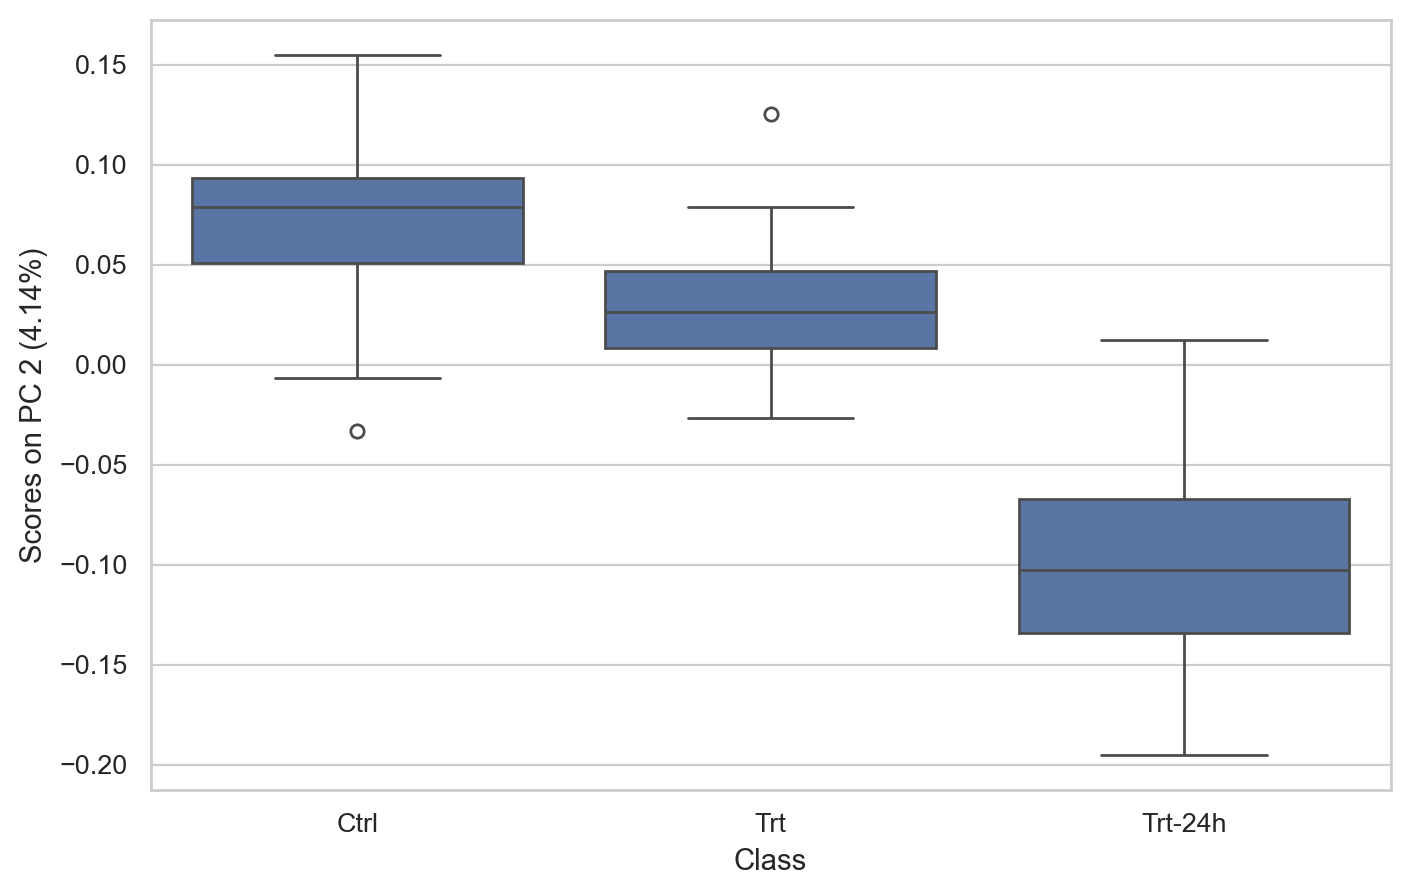

In [729]:
plt.figure(figsize = (8, 5), dpi = 200);
sns.boxplot(
    x = 'Class',
    y = 'Scores on PC 2 (4.14%)',#'Scores on PC 2 (3.61%)',
    data = scr,
    order = ['Ctrl', 'Trt', 'Trt-24h']#]
);

In [723]:
ldng = pd.read_csv("C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Para_60mins_CvT24_ldng.csv")
ldng.head(10)

exp  PC 1 (5.90%)  PC 2 (4.14%)  PC 3 (2.66%)  PC 4 (2.52%)  \
0  752.901      0.124601      0.007027      0.095226      0.042817   
1  754.044      0.096289      0.001757      0.009411      0.020053   
2  755.187      0.072541     -0.004431     -0.044404      0.003094   
3  756.329      0.052958     -0.011263     -0.071129     -0.008797   
4  757.471      0.037144     -0.018464     -0.075677     -0.016353   
5  758.613      0.024701     -0.025760     -0.062957     -0.020310   
6  759.754      0.015232     -0.032875     -0.037880     -0.021402   
7  760.896      0.008341     -0.039537     -0.005358     -0.020364   
8  762.036      0.002688     -0.050590      0.022563     -0.021123   
9  763.177      0.000097     -0.057137      0.046809     -0.020974   

   PC 5 (2.36%)  Q Residuals (82.41%)  Hotelling T^2 (17.59%)  
0      0.049573              0.050380               28.210097  
1      0.049551              0.026477               11.915278  
2      0.046157              0.019983                9.158679  
3      0.040132              0.019810                9.436770  
4      0.032219              0.020584                8.534250  
5      0.023163              0.020540                6.031601  
6      0.013704              0.019834                3.308732  
7      0.004587              0.019266                2.044719  
8     -0.002372              0.019104                3.439273  
9     -0.006717              0.018993                5.792227

In [724]:
dfl = pd.read_excel("C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet.xlsx", sheet_name='Para_60mins')
#dfl.details.unique()

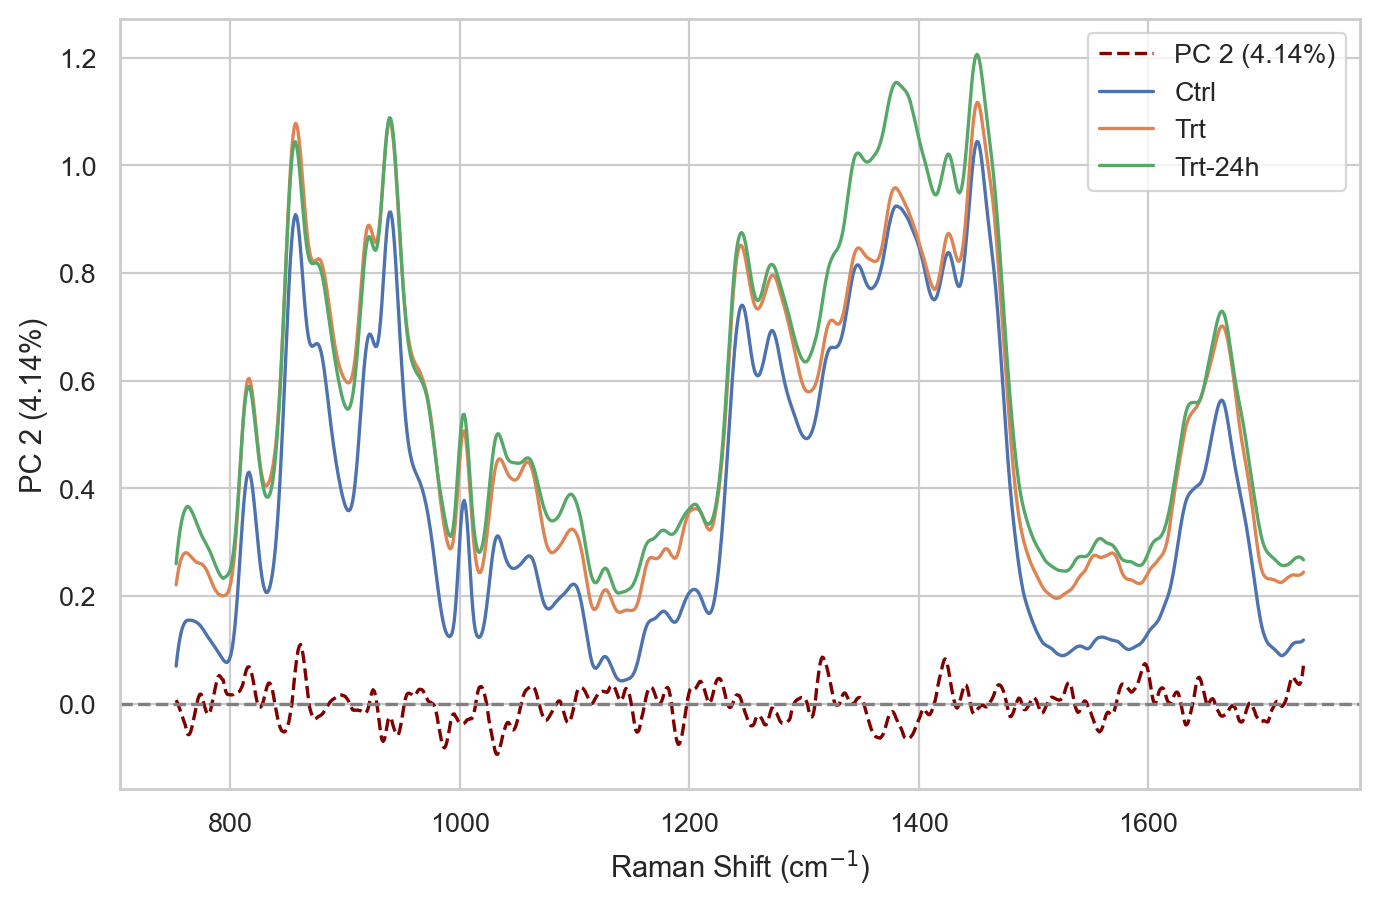

In [727]:
dflm = dfl.groupby(['sample']).mean(numeric_only=True).iloc[:, 2:]
plt.figure(figsize = (8, 5), dpi = 200)
sns.lineplot(
    x = ldng['exp'].astype(float),
    y = ldng['PC 2 (4.14%)'].astype(float),
    ls = '--',
    label = ldng.columns[2],
    color = 'maroon'
)
for x in range(0, len(dflm)):
    sns.lineplot(
        x = dflm.columns.astype(float),
        y = dflm.iloc[x, :] + x*.08,
        label = dflm.index[x]
    )
plt.xlabel("Raman Shift (cm$^{-1}$)")
plt.axhline(0, ls = '--', color = 'gray')
#plt.ylabel("Normalized Intensity (a.u.)")

### Data Summary Plots

In [858]:
dft = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\20250612\\20250612_norm.csv')
dft.head()

exp sample trt_time orient  spectra_num                    details  \
0  20250612   Ctrl   20mins   Orth            1  20250612_Ctrl_20mins_Orth   
1  20250612   Ctrl   20mins   Orth            3  20250612_Ctrl_20mins_Orth   
2  20250612   Ctrl   20mins   Orth            5  20250612_Ctrl_20mins_Orth   
3  20250612   Ctrl   20mins   Orth            7  20250612_Ctrl_20mins_Orth   
4  20250612   Ctrl   20mins   Orth            9  20250612_Ctrl_20mins_Orth   

    753.655   754.797   755.939    757.08  ...   1727.84   1728.72   1729.59  \
0 -0.002863  0.042293  0.079327  0.109062  ...  0.191194  0.194806  0.197520   
1  0.000904  0.038355  0.070527  0.097849  ...  0.164879  0.166927  0.170214   
2  0.005982  0.033509  0.055971  0.074161  ...  0.170314  0.173787  0.176125   
3  0.000654  0.024431  0.048300  0.071933  ...  0.179468  0.183671  0.189520   
4 -0.002320  0.030177  0.057378  0.079800  ...  0.125995  0.125733  0.126609   

    1730.47   1731.35   1732.22    1733.1   1733.97   1734.85   1735.72  
0  0.199474  0.200716  0.201213  0.200931  0.199834  0.197887  0.195058  
1  0.174413  0.179093  0.184060  0.189125  0.194097  0.198784  0.202995  
2  0.177904  0.178710  0.178405  0.176851  0.173909  0.169443  0.163313  
3  0.193944  0.196806  0.197471  0.195305  0.189673  0.179942  0.165476  
4  0.128670  0.131479  0.134927  0.138908  0.143315  0.148039  0.152973  

[5 rows x 984 columns]

In [859]:
dfm = dft.groupby(['details']).mean(numeric_only=True).iloc[:, 2:]#.drop(['20250609_Glass_spectra_Control'])
dfm.head()

753.655   754.797   755.939    757.08   758.221  \
details                                                                       
20250612_Ctrl_20mins_Orth  0.004228  0.036201  0.063662  0.087030  0.106727   
20250612_Ctrl_20mins_Para  0.038309  0.058018  0.075957  0.092121  0.106503   
20250612_Ctrl_24h_Orth    -0.001337  0.031938  0.060117  0.083767  0.103460   
20250612_Ctrl_24h_Para     0.022725  0.050031  0.071600  0.088110  0.100238   
20250612_Ctrl_2mins_Orth   0.037765  0.063192  0.086147  0.106624  0.124617   

                            759.362   760.503   761.642   762.782   763.922  \
details                                                                       
20250612_Ctrl_20mins_Orth  0.123171  0.136785  0.147988  0.157704  0.165773   
20250612_Ctrl_20mins_Para  0.119098  0.129898  0.138900  0.145736  0.150629   
20250612_Ctrl_24h_Orth     0.119765  0.133252  0.144490  0.154906  0.164525   
20250612_Ctrl_24h_Para     0.108661  0.114057  0.117102  0.119799  0.121243   
20250612_Ctrl_2mins_Orth   0.140122  0.153132  0.163642  0.170644  0.174792   

                           ...   1727.84   1728.72   1729.59   1730.47  \
details                    ...                                           
20250612_Ctrl_20mins_Orth  ...  0.153644  0.156138  0.158942  0.161579   
20250612_Ctrl_20mins_Para  ...  0.111258  0.115031  0.117898  0.119913   
20250612_Ctrl_24h_Orth     ...  0.190485  0.194206  0.197681  0.200960   
20250612_Ctrl_24h_Para     ...  0.143791  0.148345  0.152012  0.154794   
20250612_Ctrl_2mins_Orth   ...  0.132795  0.136635  0.139602  0.141613   

                            1731.35   1732.22    1733.1   1733.97   1734.85  \
details                                                                       
20250612_Ctrl_20mins_Orth  0.163786  0.165350  0.166062  0.165710  0.164084   
20250612_Ctrl_20mins_Para  0.121073  0.121278  0.120427  0.118419  0.115156   
20250612_Ctrl_24h_Orth     0.203816  0.206130  0.207781  0.208649  0.208613   
20250612_Ctrl_24h_Para     0.156666  0.157569  0.157442  0.156225  0.153861   
20250612_Ctrl_2mins_Orth   0.142525  0.142170  0.140378  0.136982  0.131812   

                            1735.72  
details                              
20250612_Ctrl_20mins_Orth  0.160972  
20250612_Ctrl_20mins_Para  0.110535  
20250612_Ctrl_24h_Orth     0.207553  
20250612_Ctrl_24h_Para     0.150287  
20250612_Ctrl_2mins_Orth   0.124700  

[5 rows x 978 columns]

In [862]:
para = dfm[dfm.index.str.contains('Para')]

In [868]:
para[para.index.str.contains('2min')]

753.655   754.797   755.939    757.08   758.221  \
details                                                                        
20250612_Ctrl_2mins_Para    0.079401  0.092539  0.104729  0.115822  0.125665   
20250612_Trt_2mins24h_Para  0.138687  0.161181  0.177918  0.189602  0.196933   
20250612_Trt_2mins_Para     0.183159  0.192849  0.200922  0.207472  0.212593   

                             759.362   760.503   761.642   762.782   763.922  \
details                                                                        
20250612_Ctrl_2mins_Para    0.134111  0.141008  0.146207  0.148360  0.148761   
20250612_Trt_2mins24h_Para  0.200614  0.201345  0.199828  0.197781  0.195019   
20250612_Trt_2mins_Para     0.216381  0.218930  0.220333  0.220705  0.220244   

                            ...   1727.84   1728.72   1729.59   1730.47  \
details                     ...                                           
20250612_Ctrl_2mins_Para    ...  0.143903  0.151145  0.157677  0.163172   
20250612_Trt_2mins24h_Para  ...  0.102039  0.101657  0.100373  0.098044   
20250612_Trt_2mins_Para     ...  0.113904  0.116366  0.118585  0.120635   

                             1731.35   1732.22    1733.1   1733.97   1734.85  \
details                                                                        
20250612_Ctrl_2mins_Para    0.167316  0.169754  0.170132  0.168097  0.163293   
20250612_Trt_2mins24h_Para  0.095022  0.091384  0.087203  0.082554  0.077512   
20250612_Trt_2mins_Para     0.122390  0.123713  0.124463  0.124504  0.123697   

                             1735.72  
details                               
20250612_Ctrl_2mins_Para    0.155367  
20250612_Trt_2mins24h_Para  0.072152  
20250612_Trt_2mins_Para     0.121903  

[3 rows x 978 columns]

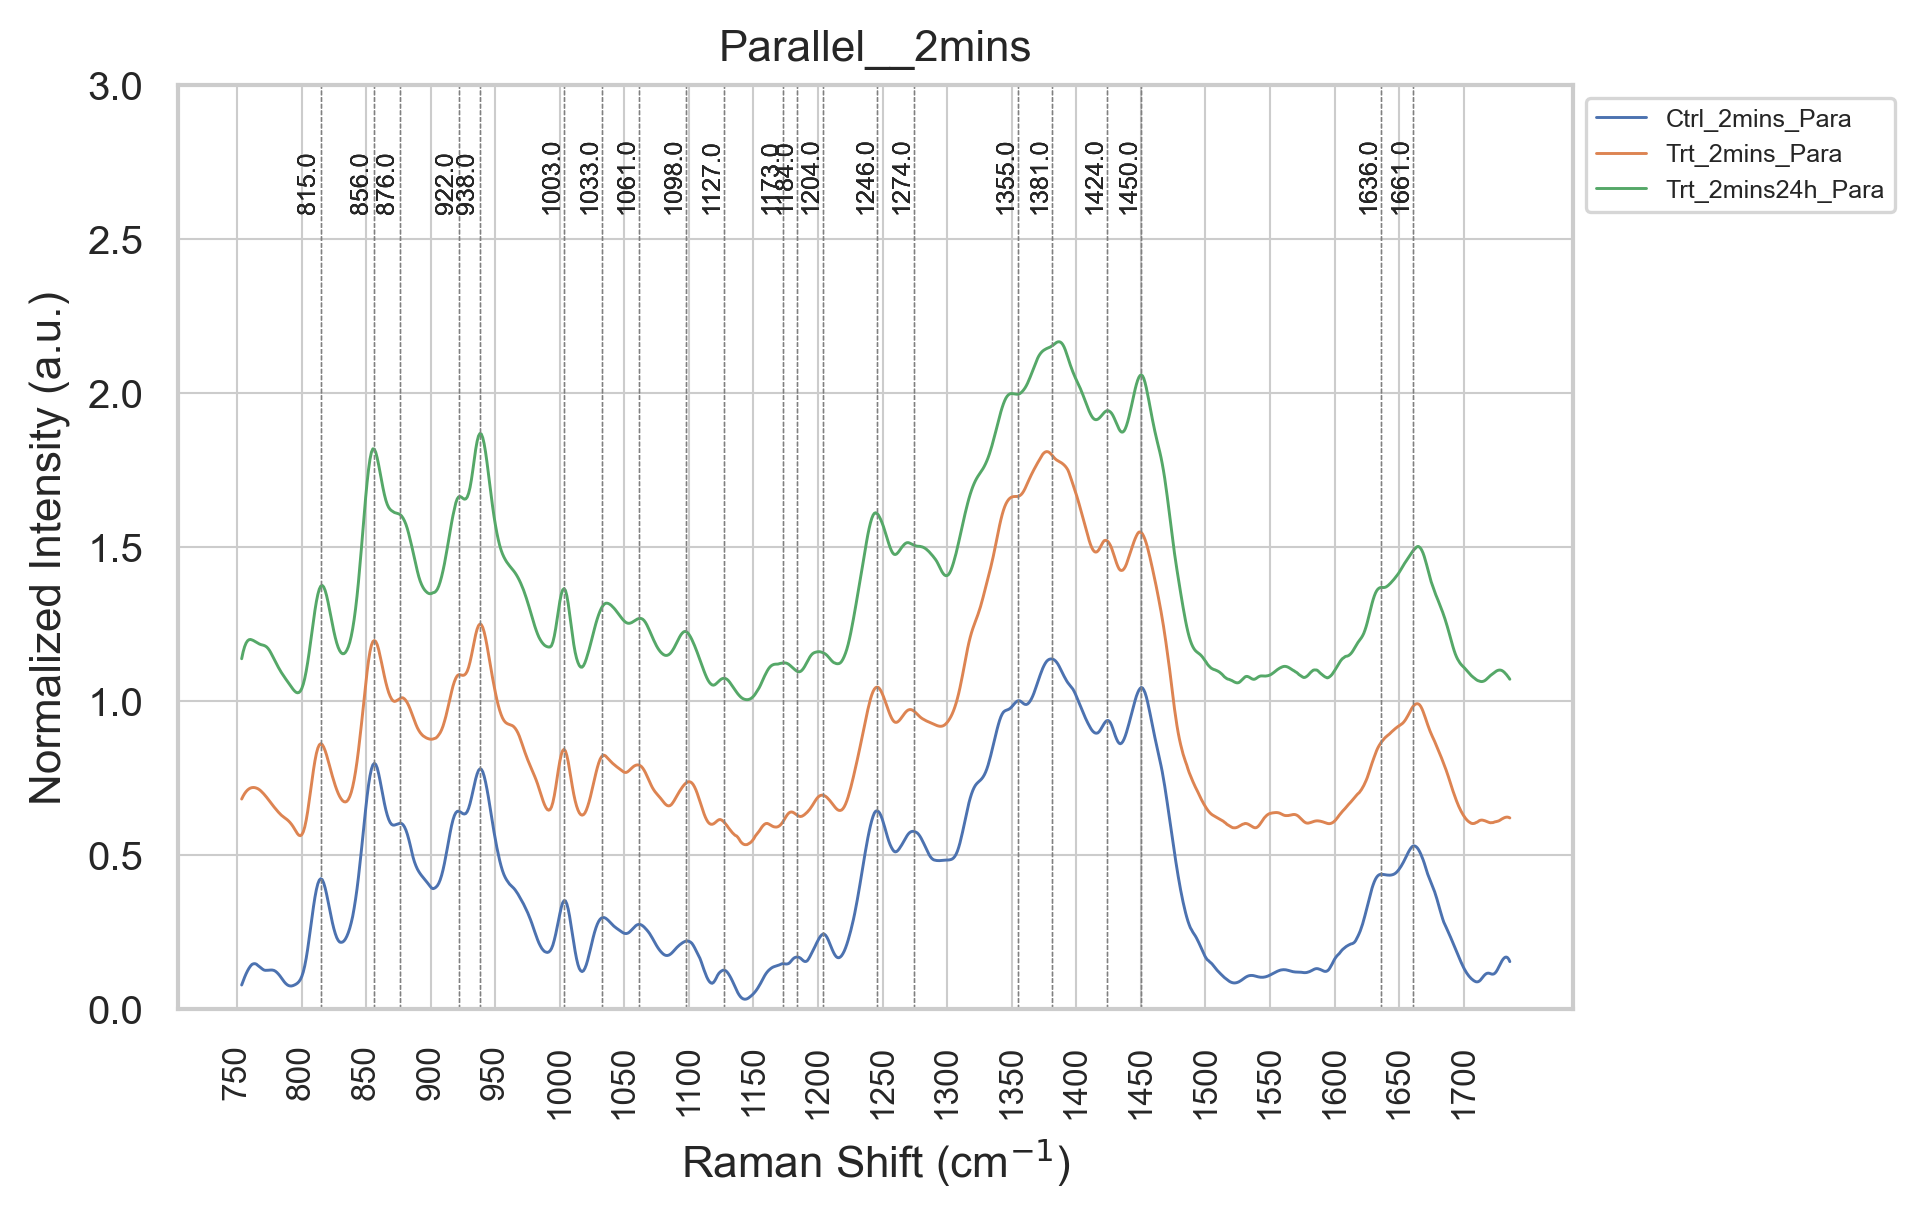

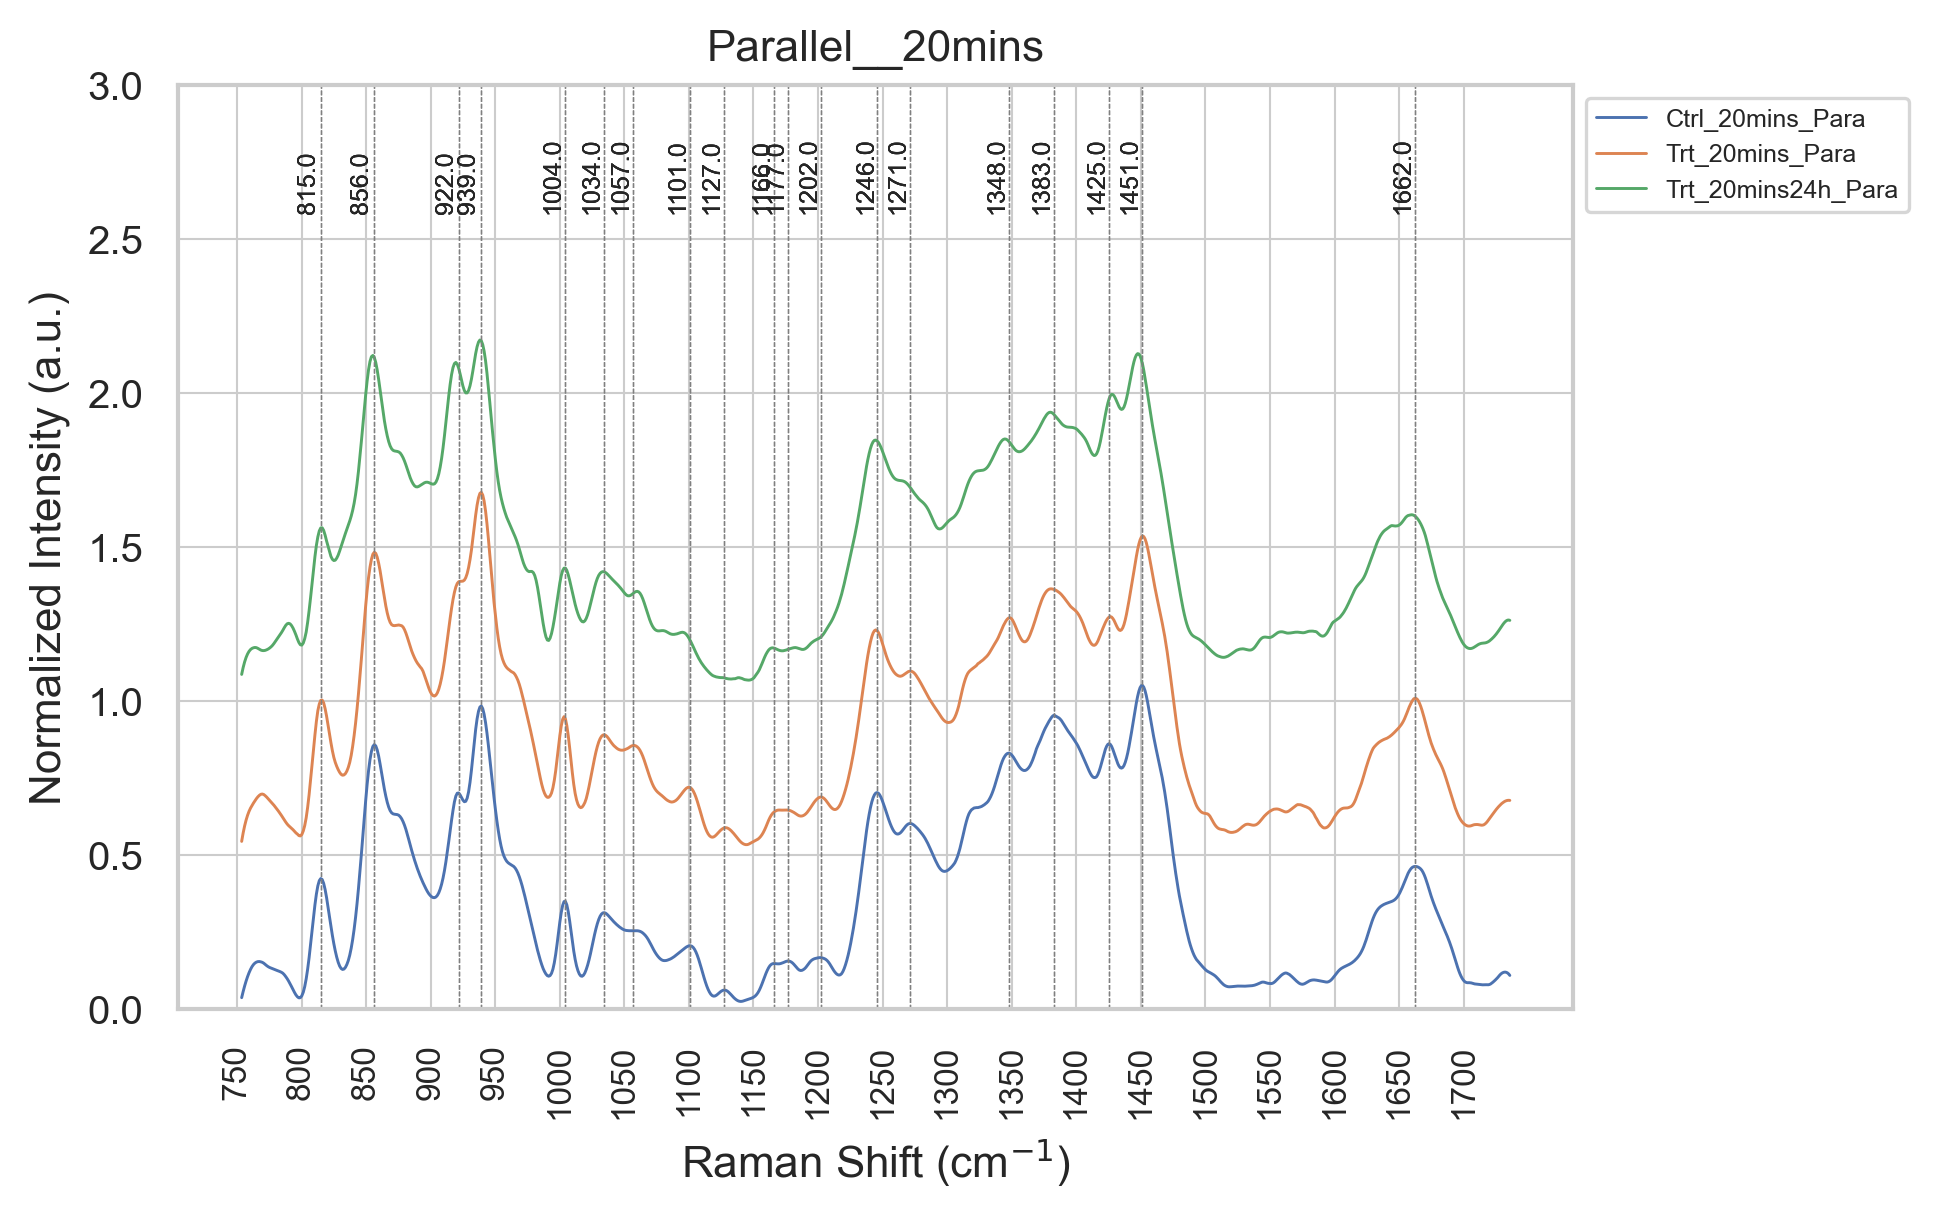

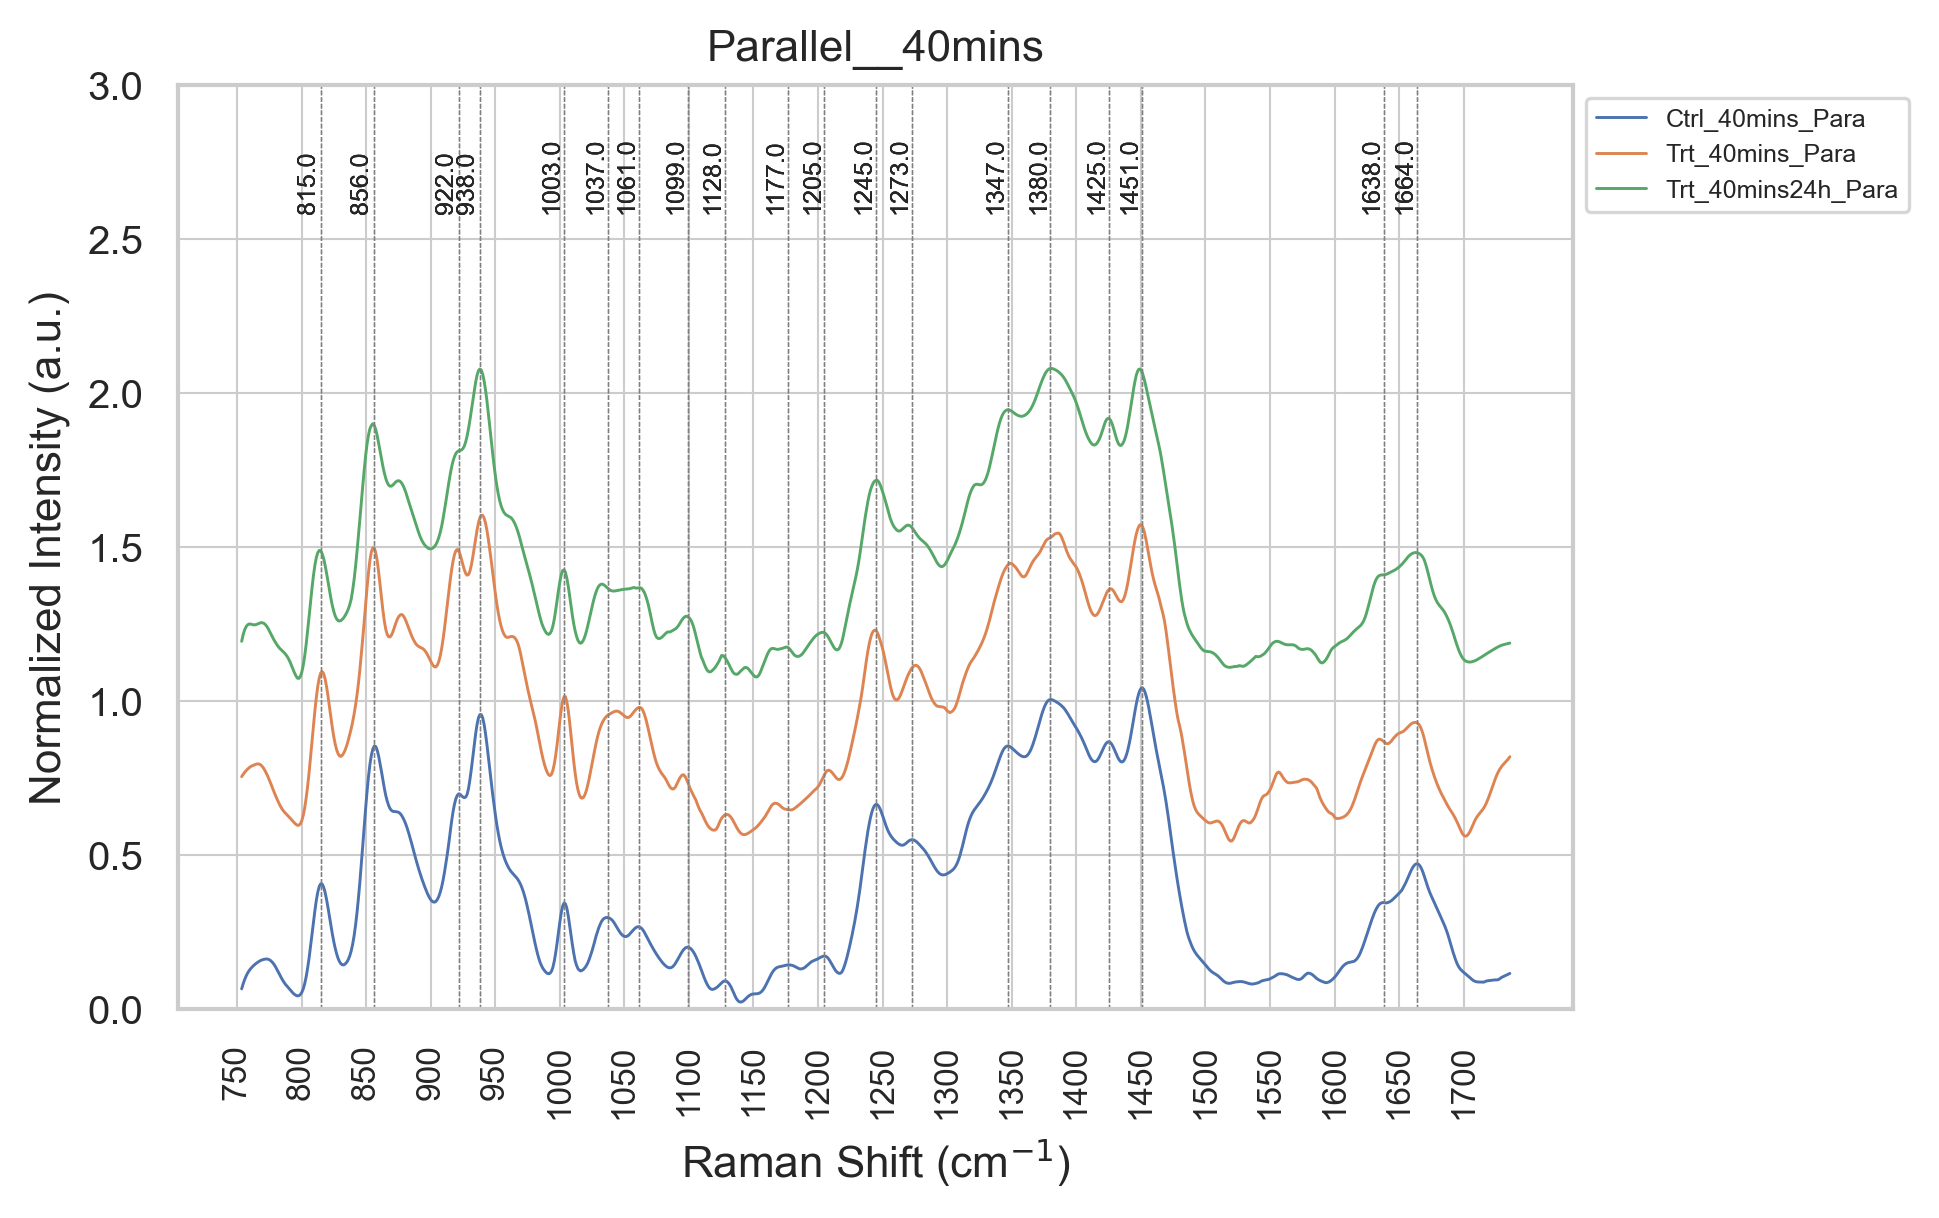

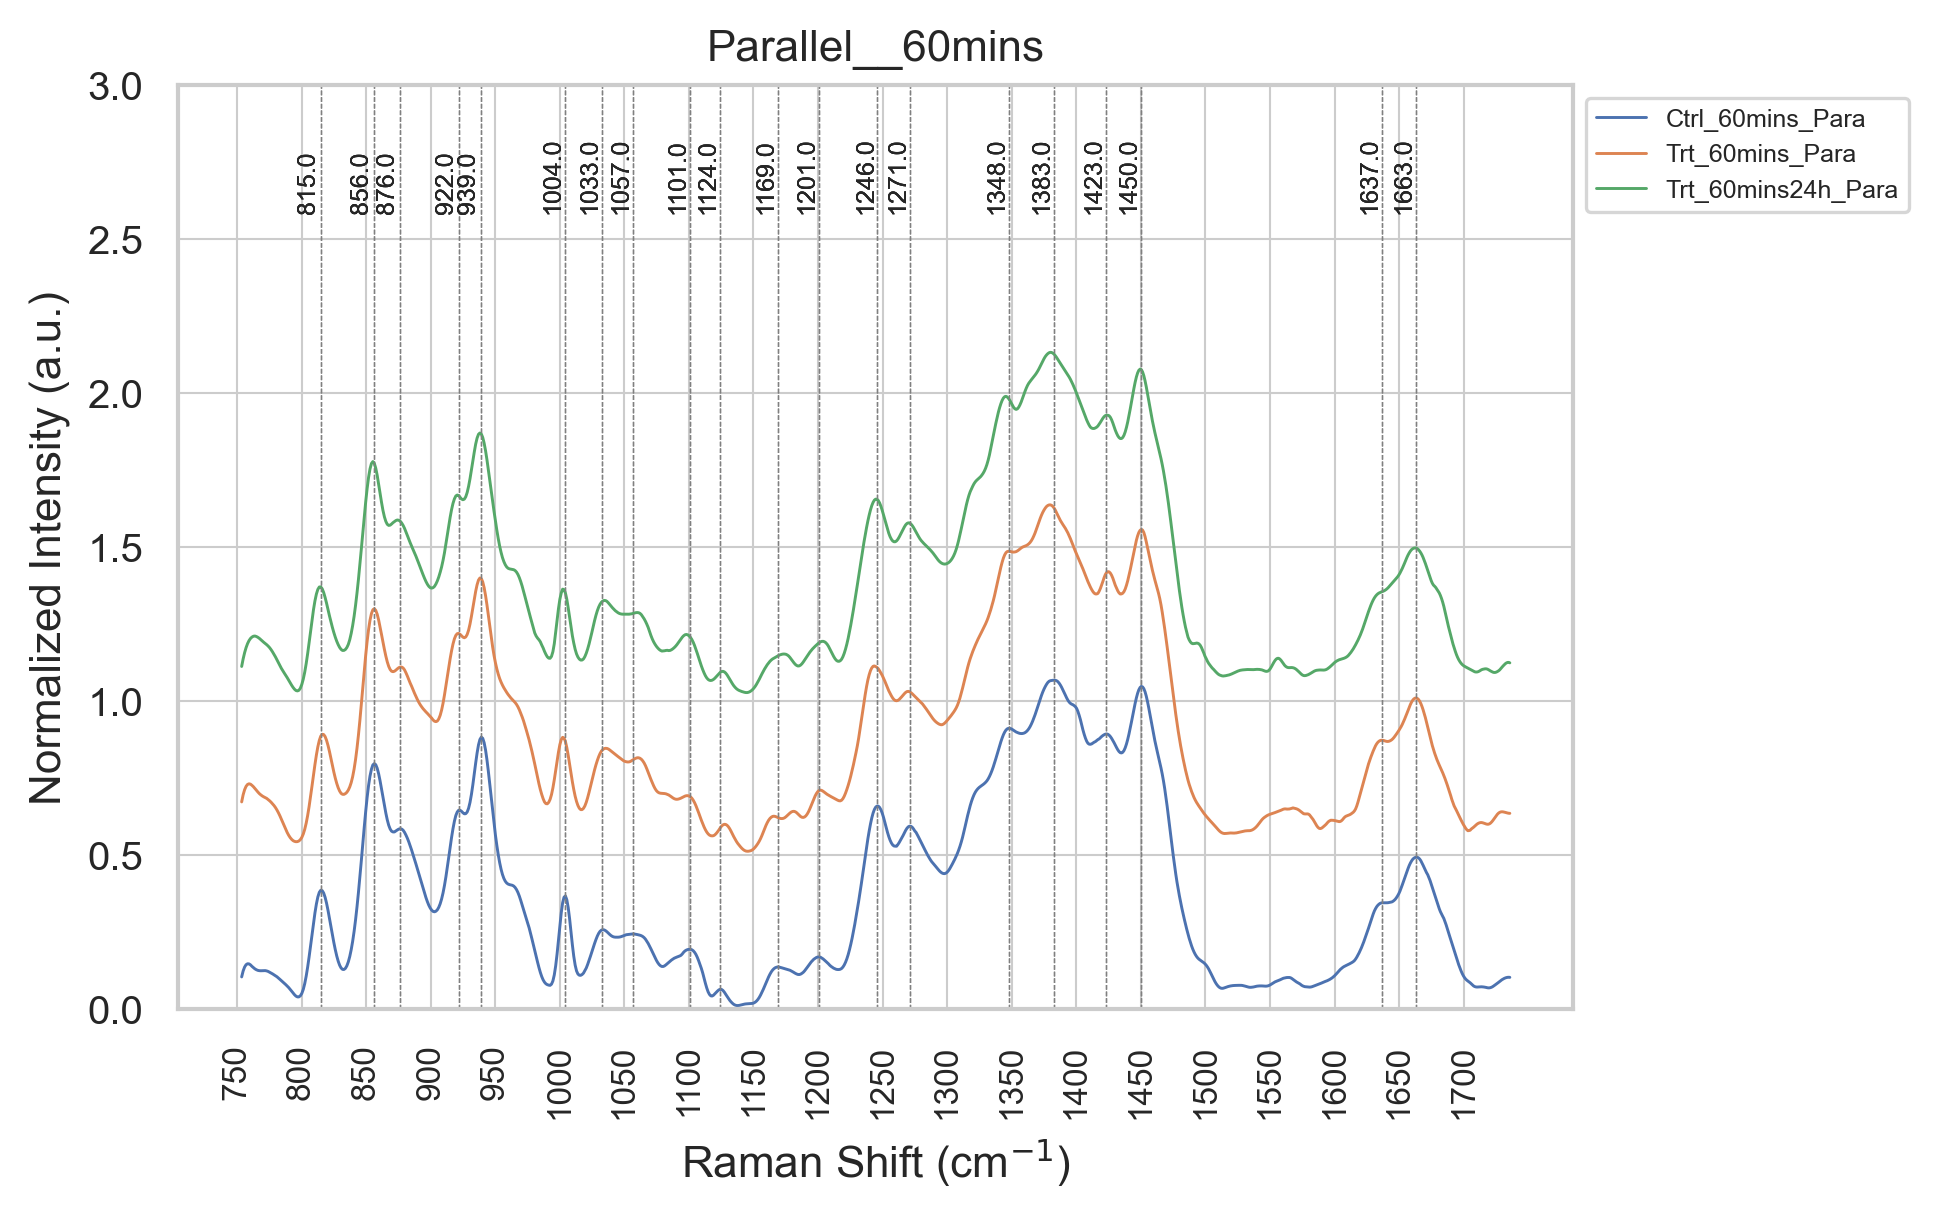

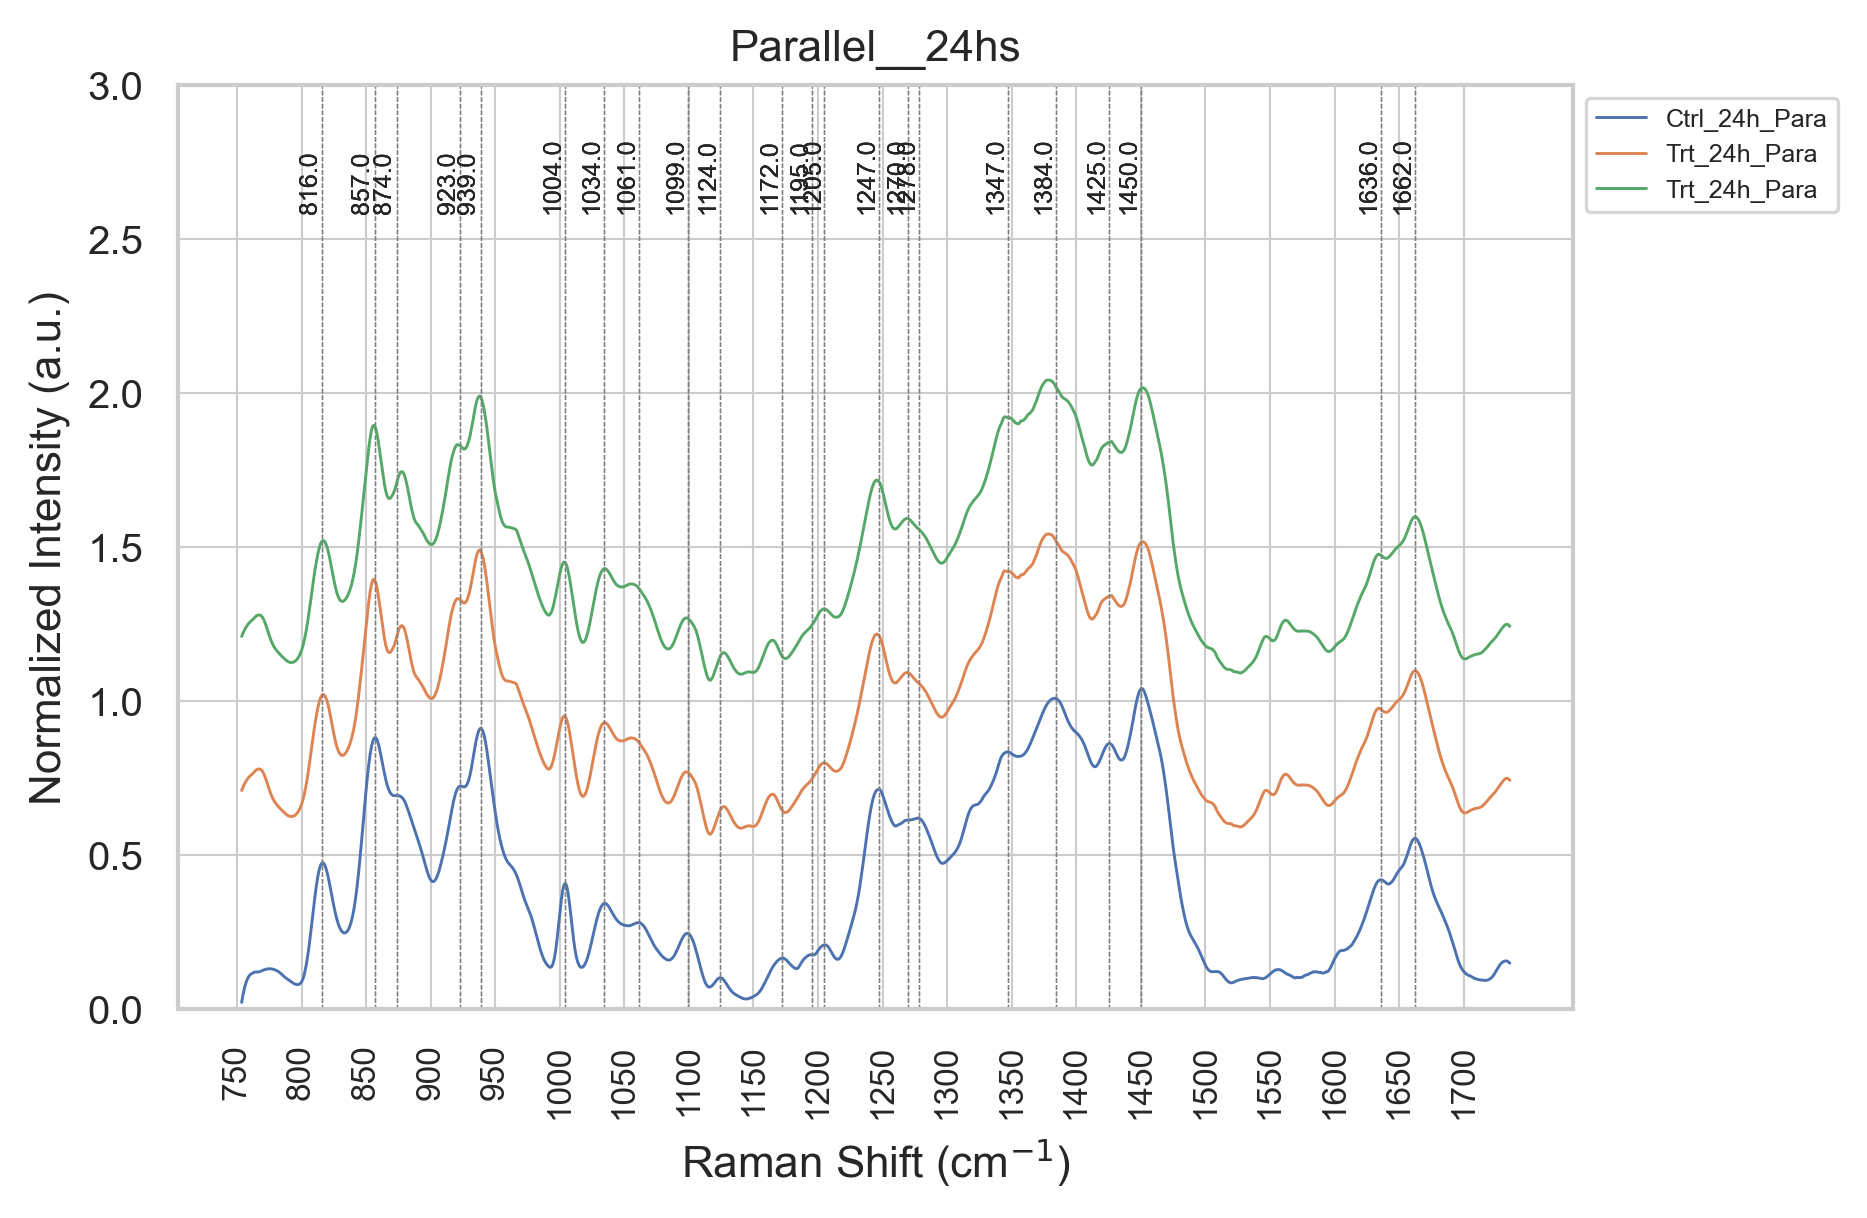

In [872]:
for i in ['_2min', '_20min', '_40min', '_60min', '_24h']:
    plot_df = para[para.index.str.contains(i)]
    plt.figure(figsize = (6, 4), dpi = 300)
    for x in [0, -1, 1]: #range(0, len(plot_df)):
    # print(para[para.index.str.contains('2min')].index[x])
        if x == -1:
            sns.lineplot(
            x = plot_df.columns.astype(float),
            y = plot_df.iloc[x] + x*-.5,
            label = plot_df.index[x][9:],
            lw = .7
        )
        else:
            sns.lineplot(
                x = plot_df.columns.astype(float),
                y = plot_df.iloc[x] + x*1,
                label = plot_df.index[x][9:],
                lw = .7
            )
        plt.title(f'Parallel_{i}s')
        plt.legend(bbox_to_anchor = (1, 1), fontsize = 6)
        plt.xlabel("Raman Shift (cm$^{-1}$)")
        plt.ylabel("Normalized Intensity (a.u.)")
        plt.ylim(0, 3)
        plt.xticks(np.arange(750, 1750, 50), fontsize = 8, rotation = 90, ha='center')
        plt.grid(lw = .5)
   
        pks = find_peaks(plot_df.iloc[0, :].values, height = -1)[0]
       
        for v in plot_df.columns.astype(float)[pks].round(0): 
                if (v > 800) and not (1500 <= v <= 1600) and (v < 1670):
                    plt.axvline(v, color = 'gray', ls = '--', lw = .3)
                    plt.text(v - .5, 2.6, rotation = 90, fontsize = 6, s = f'{v}', horizontalalignment='right')
    #            else:
    #                plt.text(v+0.08, 1.8, rotation = 90, fontsize = 10, s = f'{v}')

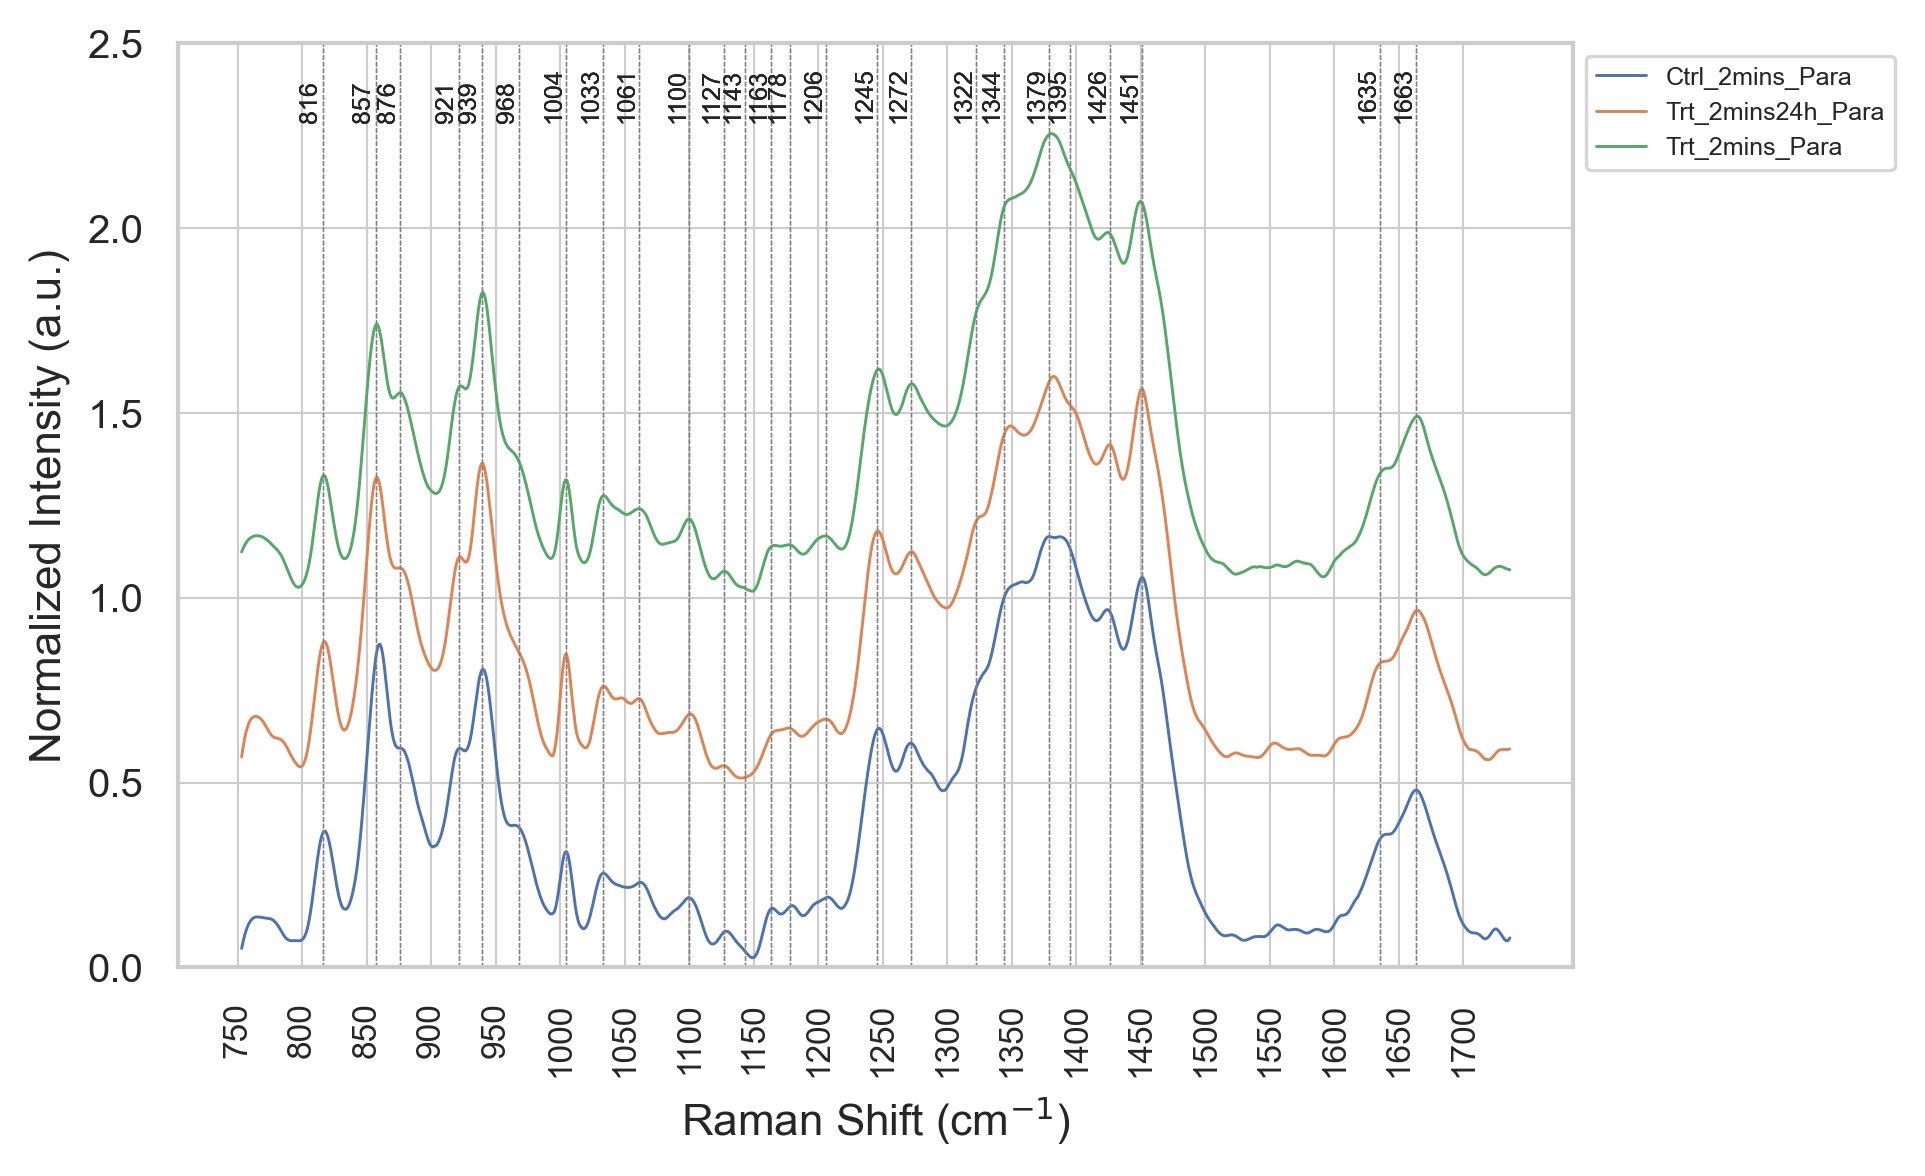

In [745]:
plot_df = para[para.index.str.contains('2min')]
#plot_df = pd.concat([pd.DataFrame(para[para.index.str.contains('Ctrl')].mean(), columns = ['20250429_Ctrl_Para_Mean']).T, plot_df], axis=0)
plt.figure(figsize = (6, 4), dpi = 300)
for x in range(0, len(plot_df)):
   # print(para[para.index.str.contains('2min')].index[x])
    
    sns.lineplot(
        x = plot_df.columns.astype(float),
        y = plot_df.iloc[x] + x*.5,
        label = plot_df.index[x][9:],
        lw = .7
    )
    plt.legend(bbox_to_anchor = (1, 1), fontsize = 6)
    plt.xlabel("Raman Shift (cm$^{-1}$)")
    plt.ylabel("Normalized Intensity (a.u.)")
    plt.ylim(0, 2.5)
    plt.xticks(np.arange(750, 1750, 50), fontsize = 8, rotation = 90, ha='center')
    plt.grid(lw = .5)
#1178, 
    for v in [816, 857, 876, 921, 939, 968, 1004,1033, 1061, 1100, 1127, 1143, 1163, 1178, 1206, 1245, 1272, 1322, 1344, 1379, 1395, 1426, 1451, 1635, 1663]:#1402,
            plt.axvline(v, color = 'gray', ls = '--', lw = .3)
            plt.text(v - .5, 2.3, rotation = 90, fontsize = 6, s = f'{v}', horizontalalignment='right')
#            else:
#                plt.text(v+0.08, 1.8, rotation = 90, fontsize = 10, s = f'{v}')

In [647]:
rmse1 = []
for w in range(10, 36, 2):
    for p in range(2, 5):
    #print(w)
      for x in range(len(df)):
          
          spectrum = bc_df.iloc[x, 5:].to_numpy(dtype=float)
          #print(spectrum)
          smoothed = sp.signal.savgol_filter(x= spectrum, window_length=w, polyorder=p)
          #print(smoothed)
          rmse = np.sqrt(np.mean((spectrum - smoothed) **2))
          rel_rmse = (rmse/np.max(spectrum))*100
          #print(rmse)

          rmse1.append({'sample':df.loc[x, 'sample'],
                        'trt_time':df.loc[x, 'trt_time'],
                        'orient':df.loc[x, 'orient'],
                          'window': w,
                          'polynomial': p,
                      'rmse': rmse,
                      'rel_rmse': rel_rmse})

KeyError: 'trt_time'

In [ ]:
# Parameters
polyorder = 2
window_sizes = np.arange(5, 51, 2)  # Must be odd

rmse_values = []
relative_rmse_values = []

for w in window_sizes:
    smoothed = savgol_filter(raw_spectrum, window_length=w, polyorder=polyorder)
    rmse = np.sqrt(np.mean((raw_spectrum - smoothed) ** 2))
    relative_rmse = rmse / np.mean(np.abs(raw_spectrum))
    
    rmse_values.append(rmse)
    relative_rmse_values.append(relative_rmse)

# ----------------------------
# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(window_sizes, rmse_values, marker='o')
plt.title("RMSE vs. Window Size")
plt.xlabel("Window Size")
plt.ylabel("RMSE")

plt.subplot(1, 2, 2)
plt.plot(window_sizes, np.array(relative_rmse_values) * 100, marker='o', color='green')
plt.title("Relative RMSE vs. Window Size")
plt.xlabel("Window Size")
plt.ylabel("Relative RMSE (%)")

plt.tight_layout()
plt.show()

NameError: name 'raw_spectrum' is not defined

In [ ]:
rmse_window = pd.concat([pd.DataFrame(rmse1)], axis=1)
rmse_window

sample trt_time orient  window  polynomial       rmse  rel_rmse
0      Ctrl   20mins   Orth      10           2   4.632827  0.773571
1      Ctrl   20mins   Orth      10           2   3.654034  0.683194
2      Ctrl   20mins   Orth      10           2   3.546049  0.691735
3      Ctrl   20mins   Orth      10           2   3.369140  0.681896
4      Ctrl   20mins   Orth      10           2   3.459991  0.734548
...     ...      ...    ...     ...         ...        ...       ...
7756    Trt   60mins   Orth      34           4   3.341701  1.731336
7757    Trt   60mins   Orth      34           4   4.475594  1.295684
7758    Trt   60mins   Orth      34           4  10.456035  1.211112
7759    Trt   60mins   Orth      34           4   6.242820  1.532812
7760    Trt   60mins   Para      34           4   2.810221  1.919196

[7761 rows x 7 columns]

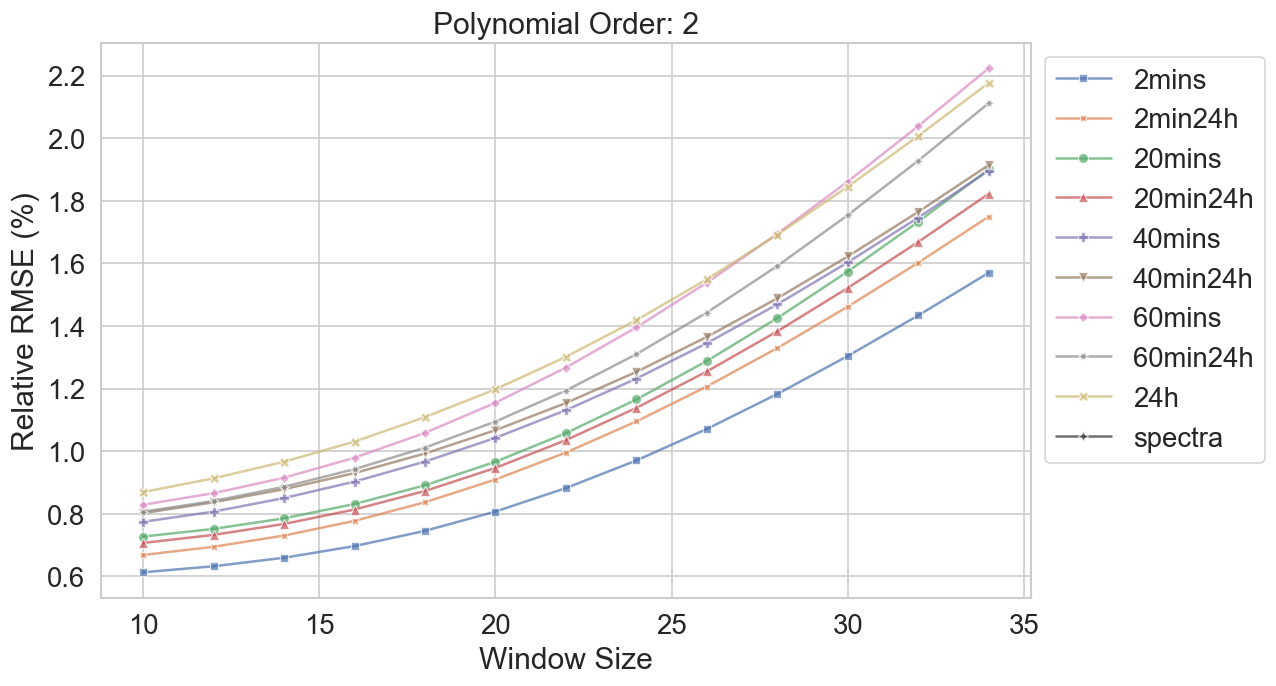

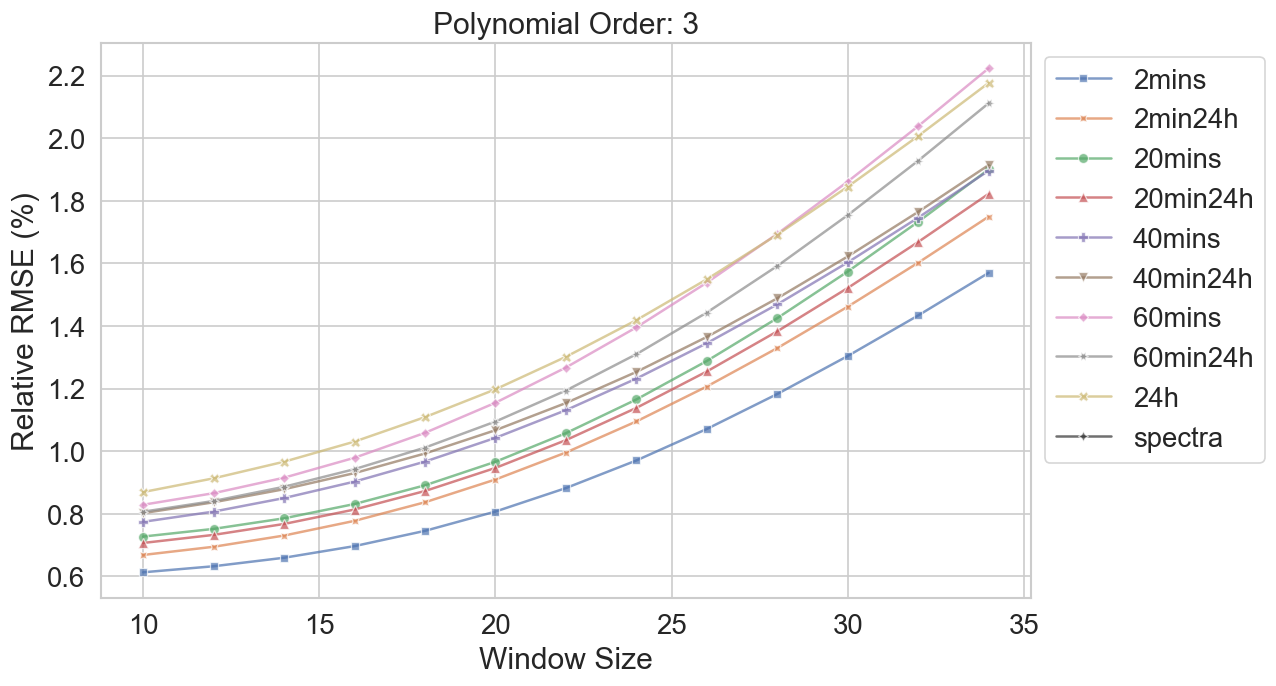

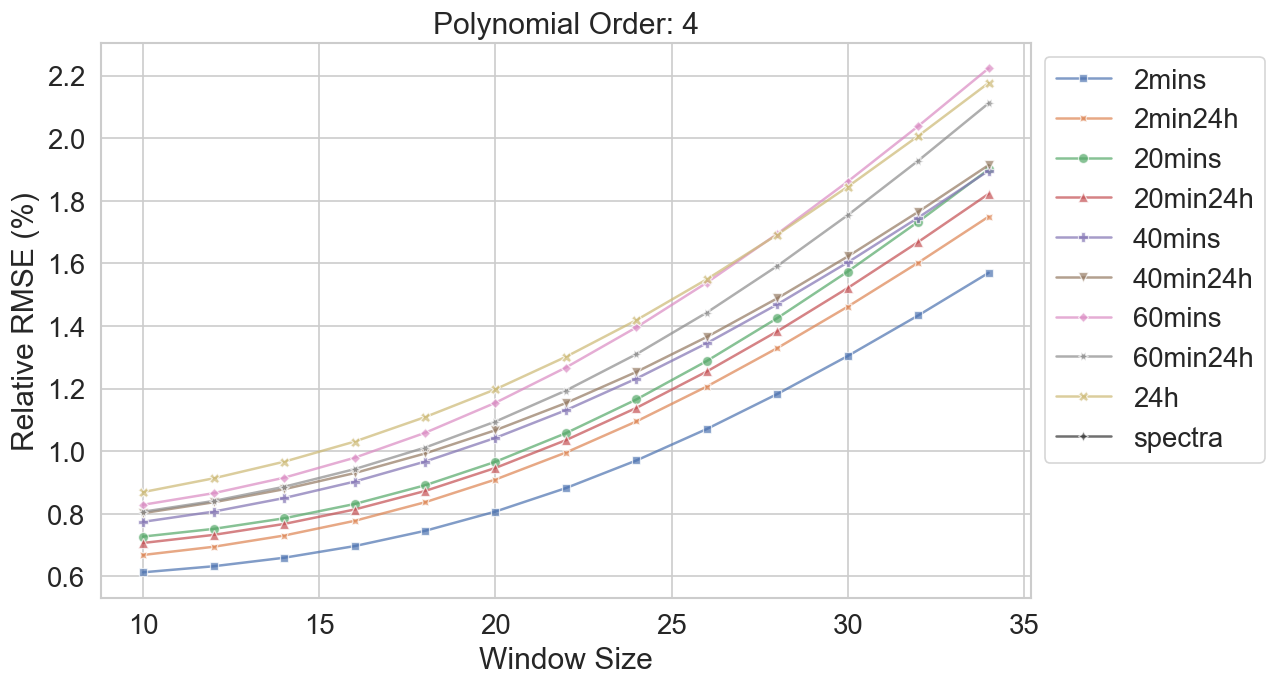

In [ ]:
for p in rmse_window['polynomial'].unique():
    plt.figure(figsize = (10, 6), dpi = 120);

    sns.lineplot(
        x = 'window',
        y = 'rel_rmse',
        data=rmse_window,
        markers=True,
        hue = 'trt_time',
        hue_order=['2mins', '2min24h','20mins','20min24h','40mins', '40min24h','60mins', '60min24h', '24h'], 
        style = 'trt_time',
        #style_order=['2mins', '2min24h','20mins','20min24h','40mins', '40min24h','60mins', '60min24h', '24h'], 
        dashes = False,
        errorbar=None,
        alpha = .7,
        #err_style = 'bars'
    );
    plt.legend(bbox_to_anchor = (1, 1));
    plt.title(f'Polynomial Order: {p}');
    plt.ylabel('Relative RMSE (%)')
    plt.xlabel('Window Size')

In [ ]:
meta_cols = ['exp', 'sample', 'trt_time', 'orient', 'spectra_num']
spectral_start_col = 4
#wavenumbers = smoothed_df.columns.to_numpy(float)
spectral_cols = smoothed_df.iloc[:, 5:-1].columns#.difference(['exp', 'sample', 'trt_time', 'orient', 'combo'])
wavenumbers = np.array([float(col) for col in spectral_cols])

# ------------------------
# Create combo labels
# ------------------------
def combo_label(row):
    return f"{row['exp']}|{row['sample']}|{row['trt_time']}|{row['orient']}|{row['spectra_num']}"

smoothed_df['combo'] = smoothed_df[meta_cols].apply(combo_label, axis=1)
unique_combos = smoothed_df['combo'].unique()

# ------------------------
# Initialize Dash App
# ------------------------
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("Spectral Comparison Tool (Group A vs Group B)"),
    html.Div([
        html.Label("Select Group A"),
        dcc.Dropdown(id='dropdown-a', options=[{'label': c, 'value': c} for c in unique_combos],
                     value=unique_combos[0])
    ], style={'width': '45%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Group B"),
        dcc.Dropdown(id='dropdown-b', options=[{'label': c, 'value': c} for c in unique_combos],
                     value=unique_combos[1])
    ], style={'width': '45%', 'display': 'inline-block', 'marginLeft': '5%'}),

    dcc.Graph(id='spectra-plot', style={"height": "700px"})
])

# ------------------------
# Callback to update plot
# ------------------------
@app.callback(
    Output('spectra-plot', 'figure'),
    Input('dropdown-a', 'value'),
    Input('dropdown-b', 'value')
)
def update_plot(combo_a, combo_b):
    fig = go.Figure()

    offset_b = 500

    # Group A
    subset_a = smoothed_df[smoothed_df['combo'] == combo_a]
    for _, row in subset_a.iterrows():
        y = row.iloc[spectral_start_col:-1].values.astype(float)
        fig.add_trace(go.Scatter(
            x=wavenumbers,
            y=y,
            mode='lines',
            line=dict(color='blue'),
            name=f"A: {combo_a}"
        ))

    # Group B (with offset)
    subset_b = smoothed_df[smoothed_df['combo'] == combo_b]
    for _, row in subset_b.iterrows():
        y = row.iloc[spectral_start_col:-1].values.astype(float) + offset_b
        fig.add_trace(go.Scatter(
            x=wavenumbers,
            y=y,
            mode='lines',
            line=dict(color='red'),
            name=f"B: {combo_b} (+{offset_b})"
        ))

    fig.update_layout(
        title=f"Group A: {combo_a} vs Group B: {combo_b}",
        xaxis_title="Wavenumber (cm⁻¹)",
        yaxis_title="Intensity (a.u.)",
        height=600,
        width=1100,
        template="plotly_white",
        xaxis = dict(
        tickmode = 'array', 
        tickvals = np.arange(800, 1750, 50),
        range = [800, 1750]
    )
    
    )
    return fig

# ------------------------
# Run the App
# ------------------------
if __name__ == '__main__':
    app.run(debug=True)


#### Plot the Raw and Smoothed Data

In [ ]:
smoothed_list = []
for x in range(len(bc_df.iloc[:, 5:])):
    smoothed_list.append(sp.signal.savgol_filter(x= bc_df.iloc[x, 5:], window_length=20, polyorder=3))

smoothed_df = pd.DataFrame(smoothed_list, columns=bc_df.iloc[:, 5:].columns)
smoothed_df = pd.concat([df.iloc[:, :5], smoothed_df], axis=1)

In [ ]:
raw_mean = bc_df.groupby(['sample', 'trt_time', 'orient']).mean().reset_index()
smooth_mean = smoothed_df.groupby(['sample', 'trt_time', 'orient']).mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_21840\2488603349.py:20: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



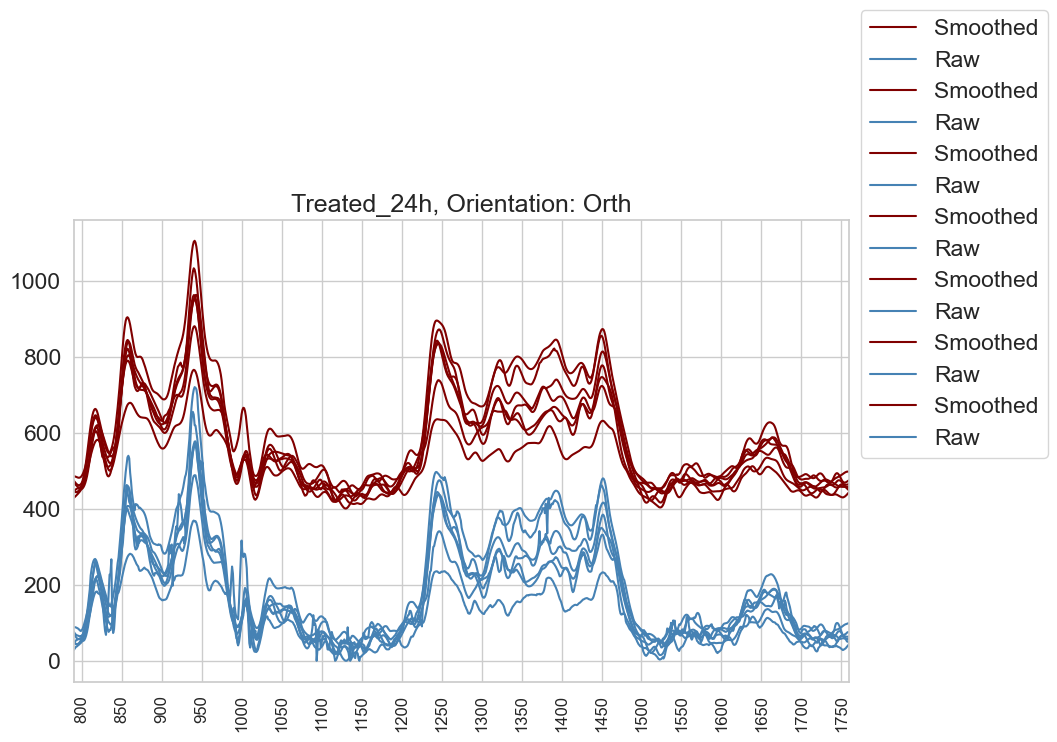

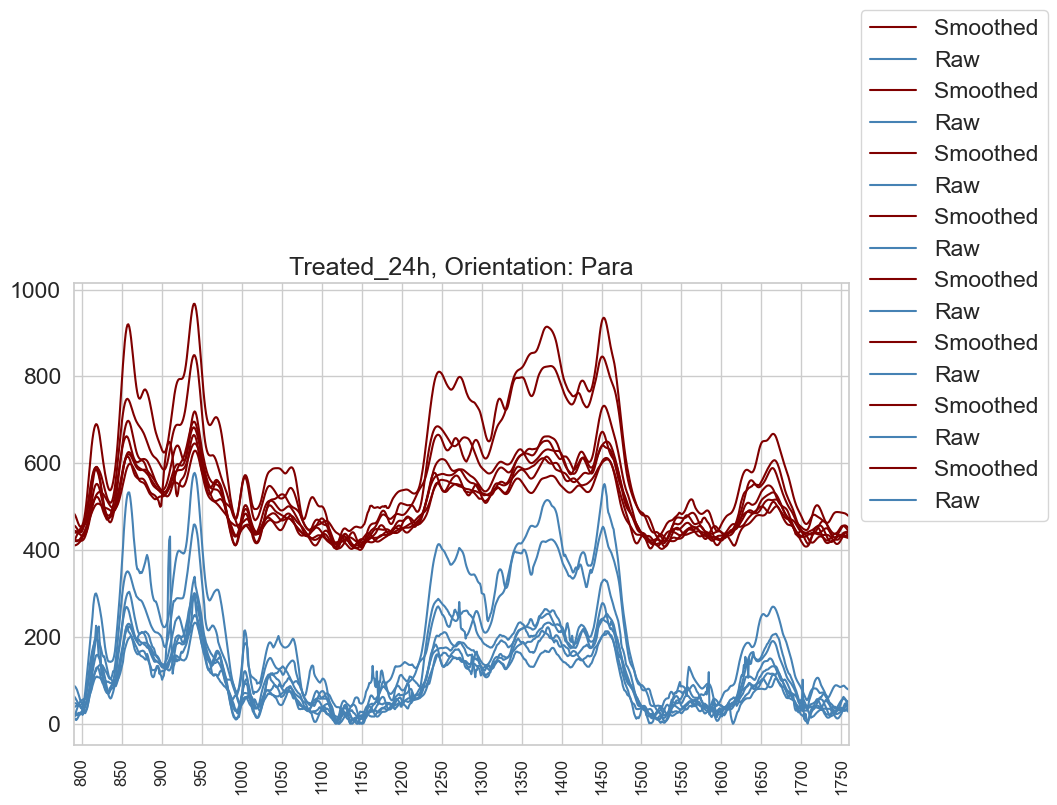

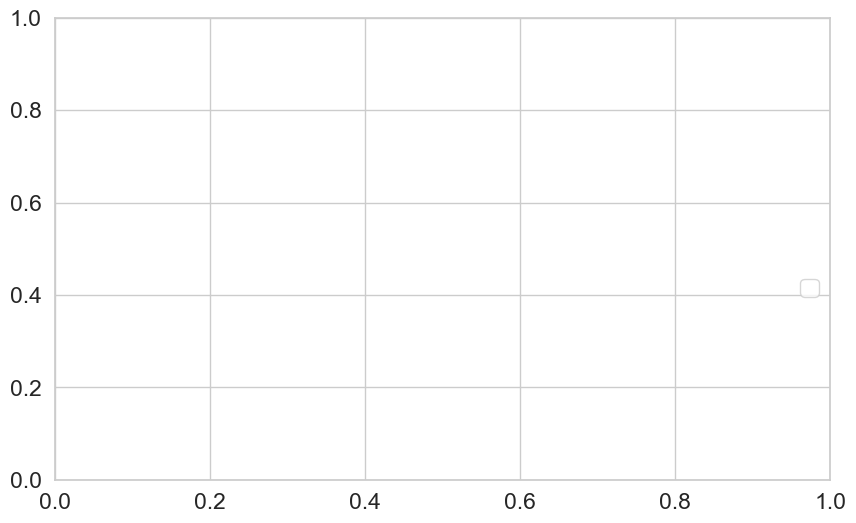

In [ ]:
for x in df['orient'].unique():
    plt.figure(figsize = (10, 6))
    for y in range(len(smoothed_df[(smoothed_df['sample']=='Trt')&(smoothed_df['trt_time']=='24h')&(smoothed_df['orient']==x)])):
        
        sns.lineplot(
            x = smoothed_df[(smoothed_df['sample']=='Trt')&(smoothed_df['trt_time']=='24h')&(smoothed_df['orient']==x)].iloc[y, 5:-1].index.to_numpy(float),
            y = smoothed_df[(smoothed_df['sample']=='Trt')&(smoothed_df['trt_time']=='24h')&(smoothed_df['orient']==x)].iloc[y, 5:-1].values+400,#[0] ,#
            label = 'Smoothed',
            color = 'maroon'
        )
        sns.lineplot(
            x = bc_df[(bc_df['sample']=='Trt')&(bc_df['trt_time']=='24h')&(bc_df['orient']==x)].iloc[y, 5:-1].index.to_numpy(float),
            y = bc_df[(bc_df['sample']=='Trt')&(bc_df['trt_time']=='24h')&(bc_df['orient']==x)].iloc[y, 5:-1].values,#[0],
            label = 'Raw',
            color = 'steelblue'
        )
        plt.title(f'Treated_24h, Orientation: {x}')
        plt.xlim(790, 1760)
        plt.xticks(ticks=np.arange(800, 1800, 50), fontsize =  12, rotation = 90, ha = 'center');
    plt.legend(bbox_to_anchor = (1, .46));

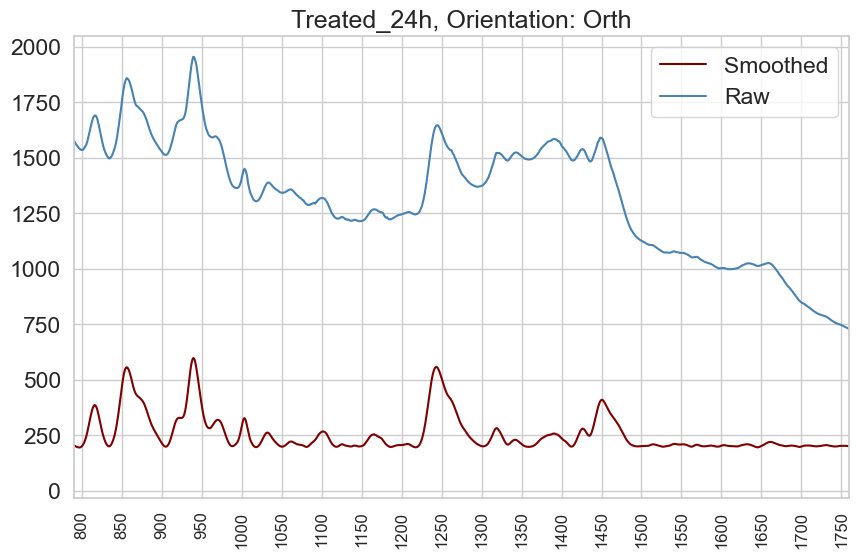

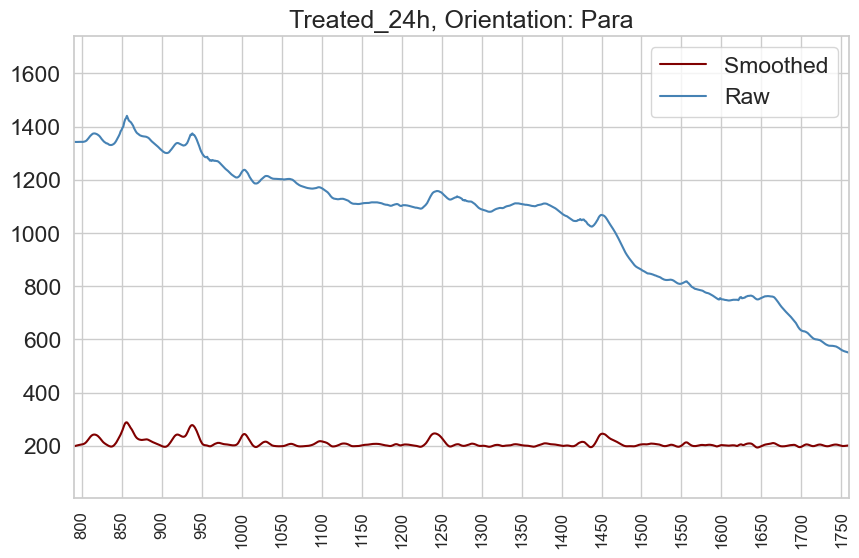

In [ ]:
for x in df['orient'].unique():
    plt.figure(figsize = (10, 6))
    sns.lineplot(
        x = smooth_mean[(smooth_mean['sample']=='Trt')&(smooth_mean['trt_time']=='24h')&(smooth_mean['orient']==x)].iloc[:, 4:].columns.to_numpy(float),
        y = smooth_mean[(smooth_mean['sample']=='Trt')&(smooth_mean['trt_time']=='24h')&(smooth_mean['orient']==x)].iloc[:, 4:].values[0],# +200,
        label = 'Smoothed',
        color = 'maroon'
    )
    sns.lineplot(
        x = raw_mean[(raw_mean['sample']=='Trt')&(raw_mean['trt_time']=='24h')&(raw_mean['orient']==x)].iloc[:, 4:].columns.to_numpy(float),
        y = raw_mean[(raw_mean['sample']=='Trt')&(raw_mean['trt_time']=='24h')&(raw_mean['orient']==x)].iloc[:, 4:].values[0],
        label = 'Raw',
        color = 'steelblue'
    )
    plt.title(f'Treated_24h, Orientation: {x}')
    plt.xlim(790, 1760)
    plt.xticks(ticks=np.arange(800, 1800, 50), fontsize =  12, rotation = 90, ha = 'center');

#### Peak Ratios

In [ ]:
smoothed_df.iloc[:, 600:700].columns

Index(['1383.92', '1384.89', '1385.87', '1386.84', '1387.82', '1388.79',
       '1389.77', '1390.74', '1391.72', '1392.69', '1393.67', '1394.64',
       '1395.61', '1396.59', '1397.56', '1398.53', '1399.51', '1400.48',
       '1401.45', '1402.42', '1403.39', '1404.36', '1405.33', '1406.3',
       '1407.27', '1408.24', '1409.21', '1410.18', '1411.15', '1412.12',
       '1413.09', '1414.06', '1415.03', '1416', '1416.96', '1417.93', '1418.9',
       '1419.86', '1420.83', '1421.8', '1422.76', '1423.73', '1424.69',
       '1425.66', '1426.62', '1427.59', '1428.55', '1429.52', '1430.48',
       '1431.44', '1432.41', '1433.37', '1434.33', '1435.3', '1436.26',
       '1437.22', '1438.18', '1439.14', '1440.1', '1441.06', '1442.03',
       '1442.99', '1443.95', '1444.91', '1445.87', '1446.82', '1447.78',
       '1448.74', '1449.7', '1450.66', '1451.62', '1452.57', '1453.53',
       '1454.49', '1455.45', '1456.4', '1457.36', '1458.32', '1459.27',
       '1460.23', '1461.18', '1462.14', '1463.09',

In [ ]:
smoothed_df.iloc[:, 850:900].columns

Index(['1619.75', '1620.66', '1621.57', '1622.48', '1623.39', '1624.29',
       '1625.2', '1626.11', '1627.02', '1627.93', '1628.84', '1629.74',
       '1630.65', '1631.56', '1632.47', '1633.37', '1634.28', '1635.19',
       '1636.09', '1637', '1637.9', '1638.81', '1639.71', '1640.62', '1641.52',
       '1642.43', '1643.33', '1644.23', '1645.14', '1646.04', '1646.94',
       '1647.84', '1648.75', '1649.65', '1650.55', '1651.45', '1652.35',
       '1653.26', '1654.16', '1655.06', '1655.96', '1656.86', '1657.76',
       '1658.66', '1659.55', '1660.45', '1661.35', '1662.25', '1663.15',
       '1664.05'],
      dtype='object')

In [ ]:
smoothed_df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20mins24h',
       '2mins24h', '40mins24h', '60mins24h'], dtype=object)

In [ ]:
pk_ratio = pd.DataFrame(smoothed_df['1663.15']/smoothed_df['1450.66'], columns = ['ratio'])
ratio_df = pd.concat([df.iloc[:, :4], pk_ratio], axis=1)
ratio_df.head()

sample trt_time orient  spectra_num     ratio
0   Ctrl   20mins   Orth            1  0.195292
1   Ctrl   20mins   Orth            2  0.295239
2   Ctrl   20mins   Orth            3  0.493274
3   Ctrl   20mins   Orth            4  0.495952
4   Ctrl   20mins   Orth            5  0.401380

In [ ]:
ratio_df[(ratio_df['trt_time'] == '40mins') & (ratio_df['sample'] == 'Trt')]

sample trt_time orient  spectra_num     ratio
126    Trt   40mins   Orth            1  0.244963
127    Trt   40mins   Orth            2  0.253808
128    Trt   40mins   Orth            4  0.263932
129    Trt   40mins   Orth            5  0.215895
130    Trt   40mins   Orth            6  0.188893
131    Trt   40mins   Para            1  0.410388
132    Trt   40mins   Para            2  0.632650
133    Trt   40mins   Para            3  0.541433
134    Trt   40mins   Para            4  0.702838
135    Trt   40mins   Para            5  0.515216

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_2620\2223017718.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_2620\2223017718.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


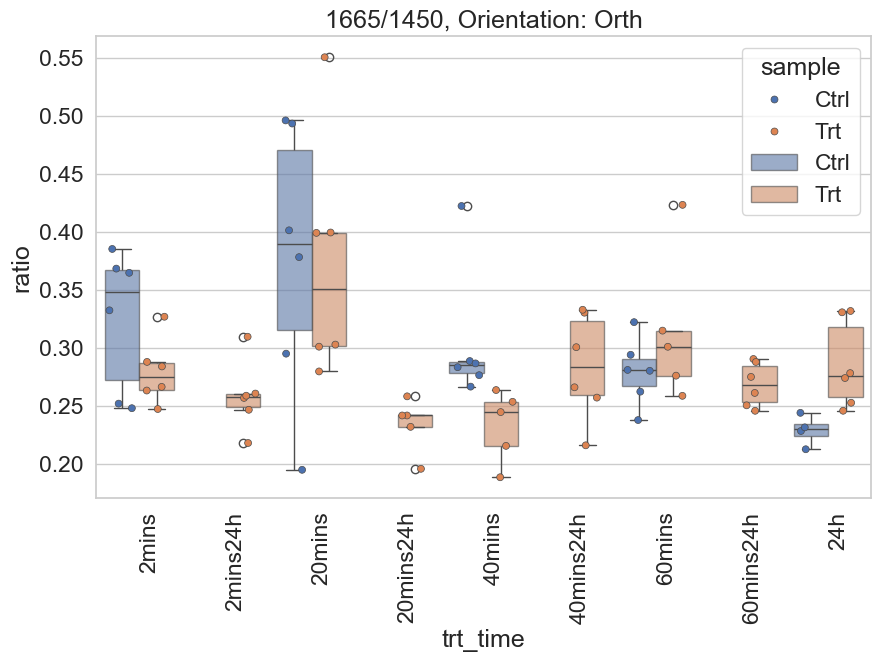

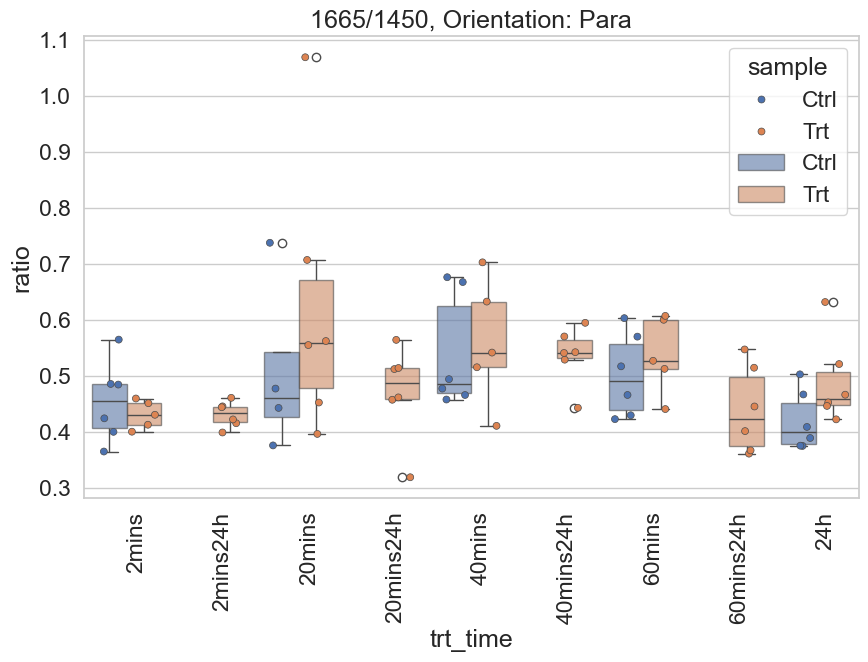

In [ ]:
for x in df['orient'].unique():
    plt.figure(figsize = (10,6));
    sns.stripplot(
        x = 'trt_time',
        y = 'ratio',
        data = ratio_df[ratio_df['orient'] == x],
        hue = 'sample',
        order = ['2mins', '2mins24h','20mins','20mins24h','40mins', '40mins24h','60mins', '60mins24h', '24h'],
        jitter = .3,
        dodge = True,
        edgecolor = 'gray',
        linewidth = .5
    );
    sns.boxplot(
        x = 'trt_time',
        y = 'ratio',
        data = ratio_df[ratio_df['orient'] == x],
        hue = 'sample',
        order = ['2mins', '2mins24h','20mins','20mins24h','40mins', '40mins24h','60mins', '60mins24h', '24h'],
        boxprops=dict(alpha=.6)
        #jitter = .3,
        #dodge = True
    );
    plt.xticks(rotation = 90, ha = 'left');
    plt.title(f'1665/1450, Orientation: {x}');

In [ ]:
def baseline_correct_spectrum(y, method='arpls', lam=1e5):
    baseline_fitter = Baseline()
    # pybaselines returns (baseline, params)
    baseline, _ = getattr(baseline_fitter, method)(y, lam=lam)
    return baseline

def baseline_correct_dataframe(df, method='arpls', lam=1e5):
    corrected = []
    for idx, row in df.iterrows():
        y = np.asarray(row.values, dtype=np.float64)
        baseline = baseline_correct_spectrum(y, method=method, lam=lam)
        corrected.append(y - baseline)
    return pd.DataFrame(corrected, columns=df.columns, index=df.index)


In [ ]:
corrected_df = baseline_correct_dataframe(df = df.iloc[:, 4:], method = 'arpls', lam = 1e5)

In [ ]:
df.columns[600:700]

Index(['1384.42', '1385.4', '1386.37', '1387.35', '1388.33', '1389.3',
       '1390.28', '1391.25', '1392.23', '1393.2', '1394.18', '1395.15',
       '1396.12', '1397.1', '1398.07', '1399.04', '1400.02', '1400.99',
       '1401.96', '1402.93', '1403.91', '1404.88', '1405.85', '1406.82',
       '1407.79', '1408.76', '1409.73', '1410.7', '1411.67', '1412.64',
       '1413.61', '1414.58', '1415.55', '1416.51', '1417.48', '1418.45',
       '1419.42', '1420.38', '1421.35', '1422.32', '1423.29', '1424.25',
       '1425.22', '1426.18', '1427.15', '1428.11', '1429.08', '1430.04',
       '1431.01', '1431.97', '1432.93', '1433.9', '1434.86', '1435.82',
       '1436.79', '1437.75', '1438.71', '1439.67', '1440.63', '1441.6',
       '1442.56', '1443.52', '1444.48', '1445.44', '1446.4', '1447.36',
       '1448.32', '1449.28', '1450.24', '1451.19', '1452.15', '1453.11',
       '1454.07', '1455.03', '1455.98', '1456.94', '1457.9', '1458.85',
       '1459.81', '1460.77', '1461.72', '1462.68', '1463.63'

In [ ]:
base_df = pd.concat([df.iloc[:, :3], corrected_df], axis=1)
base_df.to_csv('20250429-0501.csv', index = False)

In [ ]:
df#.iloc[:, 4:]

exp  Unnamed: 0 sample trt_time orient    752.673    753.817  \
0    20250609           0   Ctrl   20mins   Orth  20.135100  26.775000   
1    20250609           1   Ctrl   20mins   Orth  20.984000  28.009200   
2    20250609           2   Ctrl   20mins   Orth  15.713000  20.535500   
3    20250609           3   Ctrl   20mins   Orth  21.460000  23.165300   
4    20250609           4   Ctrl   20mins   Orth  32.671100  35.894400   
..        ...         ...    ...      ...    ...        ...        ...   
180  20250609         180    Trt   60mins   Orth  19.462000  23.893300   
181  20250609         181    Trt   60mins   Para  12.563300  13.349400   
182  20250609         182    Trt   60mins   Para   0.000682   0.001352   
183  20250609         183    Trt   60mins   Para   4.612630   6.664990   
184  20250609         184    Trt   60mins   Para   3.795820   4.825130   

        754.96    756.103    757.245  ...   1769.39   1770.26   1771.13  \
0    34.650500  43.324100  52.080000  ...   6.33526   5.81454   5.31166   
1    36.107500  44.811100  53.448900  ...   2.83330   3.43919   4.68539   
2    26.208900  32.671400  39.783700  ...   6.77675   7.19366   7.60113   
3    25.098300  27.293100  29.784900  ...   7.92459   7.58894   7.27984   
4    39.578600  43.782200  48.553100  ...   8.46996   7.65848   6.99847   
..         ...        ...        ...  ...       ...       ...       ...   
180  28.753300  33.917500  39.214900  ...  16.62150  15.43090  14.27590   
181  13.984000  14.441900  14.704900  ...  20.10860  19.49810  18.81650   
182   0.002615   0.004933   0.009074  ...  13.61400  14.13750  14.02400   
183   8.854310  10.817000  12.156500  ...  11.92670  11.55570  11.16790   
184   6.067330   7.547030   9.285070  ...  11.57470  10.93900  10.31100   

         1772   1772.86   1773.73    1774.6   1775.46   1776.33   1777.19  
0     4.83020   4.37220   3.93975   3.53344   3.15475   2.80343   2.48005  
1     6.52050   8.71086  10.83640  12.39390  12.95720  12.35320  10.72970  
2     7.99417   8.36856   8.71968   9.04386   9.33650   9.59437   9.81366  
3     6.99502   6.73190   6.48850   6.26251   6.05263   5.85700   5.67463  
4     6.46199   6.02253   5.65910   5.35454   5.09669   4.87545   4.68382  
..        ...       ...       ...       ...       ...       ...       ...  
180  13.16320  12.09600  11.07840  10.11110   9.19769   8.33768   7.53306  
181  18.07350  17.27820  16.44080  15.56980  14.67630  13.76830  12.85660  
182  13.18990  11.70970   9.78792   7.68892   5.67353   3.92850   2.55380  
183  10.76600  10.35230   9.92948   9.49935   9.06499   8.62800   8.19139  
184   9.69423   9.09079   8.50331   7.93274   7.38175   6.85085   6.34209  

[185 rows x 1029 columns]

In [ ]:
norm = df.iloc[:, 5:].div(df['1455.6'], axis=0)#dt.iloc[:, 5:].sum(axis=1)
dt_norm = pd.concat([df.iloc[:, :5], norm], axis=1)
#dt_norm = dt_norm.drop(dt_norm.index[113:119])

In [ ]:
# Difference of Treated and Final Treated
df_mean = dt_norm.groupby(['exp', 'sample', 'trt_time', 'orient']).mean().reset_index()

diff = []
diff_final = []
for orient in ['Para', 'Orth']:
    for x in ['2mins','20mins','40mins', '60mins', '24h']:#
        dif = df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time']==x)].iloc[1, 4:] - df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time']==x)].iloc[0, 4:]
        #dif_24h = df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time'].isin([x, f'{x}24h']))].iloc[2, 3:]-df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time'].isin([x, f'{x}24h']))].iloc[0, 3:]
        diff.append({'trt_time': x, 'orient': orient, 'd': dif.values})
        #diff_final.append({'trt_time': x, 'orient': orient, 'd': dif_24h.values})


diff_df = pd.DataFrame(diff)
#diff_dff = pd.DataFrame(diff_final)

df_diff = pd.concat([diff_df.iloc[:, :2], diff_df['d'].apply(pd.Series)], axis = 1)
#dff_diff = pd.concat([diff_dff.iloc[:, :2], diff_dff['d'].apply(pd.Series)], axis = 1)

df_diff.columns = ['trt_time','orient'] + df_mean.iloc[:, 4:].columns.tolist()
#dff_diff.columns = ['trt_time','orient'] + df_mean.iloc[:, 3:].columns.tolist()

df_diff.insert(0, 'sample', ['diff']*len(df_diff))
#dff_diff.insert(0, 'sample', ['diff_final']*len(df_diff))
#pd.DataFrame(diff)

sub_dff =pd.concat([df_diff])#, dff_diff
sub_dff.head()

sample trt_time orient   752.673   753.817    754.96   756.103   757.245  \
0   diff    2mins   Para  2.959591  0.015568  0.016327  0.013619  0.006585   
1   diff   20mins   Para  3.085969  0.014061  0.023214  0.033070  0.041835   
2   diff   40mins   Para  0.514848  0.021322  0.016443  0.010478  0.004435   
3   diff   60mins   Para -5.714876 -0.015344 -0.025887 -0.038031 -0.050809   
4   diff      24h   Para  3.963192  0.033771  0.037155  0.042612  0.051251   

    758.388    759.53  ...   1769.39   1770.26   1771.13      1772   1772.86  \
0 -0.003544 -0.013578  ...  0.002523  0.001812  0.000950 -0.000028 -0.001087   
1  0.050706  0.060424  ...  0.016474  0.019262  0.023625  0.027934  0.033797   
2 -0.000687 -0.004228  ...  0.071781  0.071339  0.069513  0.066221  0.061664   
3 -0.063335 -0.074912  ...  0.062428  0.062067  0.061304  0.059673  0.056912   
4  0.061122  0.066834  ...  0.041836  0.040167  0.038486  0.036839  0.035257   

    1773.73    1774.6   1775.46   1776.33   1777.19  
0 -0.002188 -0.003295 -0.004370 -0.005381 -0.006300  
1  0.036945  0.034842  0.036166  0.035937  0.035017  
2  0.056274  0.050568  0.045041  0.040026  0.035695  
3  0.053178  0.048913  0.044611  0.040620  0.037121  
4  0.033767  0.032383  0.031117  0.029968  0.028934  

[5 rows x 1027 columns]

In [ ]:
df_diff = pd.concat([dt_norm, sub_dff], axis=0)
df_sam = df_diff.melt(id_vars=['exp', 'sample', 'trt_time', 'orient'])#.drop(['sample'], axis=1)
#[dt['sample'] == 'Micetail_Ribo0.5_pre']
df_sam[["variable", "value"]] = df_sam[["variable", "value"]].astype('float64')
df_sam.head()

exp sample trt_time orient  variable    value
0  20250609   Ctrl   20mins   Orth   752.673  20.1351
1  20250609   Ctrl   20mins   Orth   752.673  20.9840
2  20250609   Ctrl   20mins   Orth   752.673  15.7130
3  20250609   Ctrl   20mins   Orth   752.673  21.4600
4  20250609   Ctrl   20mins   Orth   752.673  32.6711

In [ ]:
# create offsets for each treatment group, exept the pbs
group_offsets = {
    '2mins': 0.0,
    #'Trt': 1.5,
    '20mins': 2,
    '40mins': 4.0,
    '60mins': 6.0,
    '24h':8,
    '2min24h': 0.5,
    #'Trt': 1.5,
    '20min24h': 2.5,
    '40min24h': 4.5,
    '60min24h': 6.5,
    
    
}
#'22mins': 5.7,
#    '27mins': 6.7,
 #   '32mins': 7.7
#make a copy of the dataframe
df_sam_spectra = df_sam.copy()
# add the defined offset value for each group
for group, offset in group_offsets.items():
    df_sam_spectra.loc[df_sam_spectra['trt_time']== group, 'value'] += offset

In [ ]:
df_sam['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20min24h',
       '2min24h', '40min24h', '60min24h'], dtype=object)

In [ ]:
df_sam_spectra['sample'].unique()

array(['Ctrl', 'Trt_final', 'Trt', 'diff'], dtype=object)

In [ ]:

fig = px.line(
    df_sam_spectra[(df_sam_spectra['sample']=='Ctrl') & (df_sam_spectra['orient'] =='Para')],# ,'Trt'
    x="variable", y="value", 
              color="trt_time",
              #symbol =  'orient',
              category_orders={'trt_time': ['2mins', '2min24h','20mins','20min24h','40mins', '40min24h','60mins', '60min24h', '24h']}
              )
fig.update_traces(line=dict(width=1))
fig.update_layout(
    width=1200,  # Sets the width of the plot to 800 pixels
    height=900, # Sets the height of the plot to 600 pixels
    xaxis_range = [790, 1700],
    yaxis_range = [-1, 10]
)
fig.show()

In [ ]:
fig.write_html("Parallel_Ctrl.html")

In [ ]:
df

exp sample trt_time orient    752.673    753.817     754.96  \
0    20250609   Ctrl   20mins   Orth  20.135100  26.775000  34.650500   
1    20250609   Ctrl   20mins   Orth  20.984000  28.009200  36.107500   
2    20250609   Ctrl   20mins   Orth  15.713000  20.535500  26.208900   
3    20250609   Ctrl   20mins   Orth  21.460000  23.165300  25.098300   
4    20250609   Ctrl   20mins   Orth  32.671100  35.894400  39.578600   
..        ...    ...      ...    ...        ...        ...        ...   
180  20250609    Trt   60mins   Orth  19.462000  23.893300  28.753300   
181  20250609    Trt   60mins   Para  12.563300  13.349400  13.984000   
182  20250609    Trt   60mins   Para   0.000682   0.001352   0.002615   
183  20250609    Trt   60mins   Para   4.612630   6.664990   8.854310   
184  20250609    Trt   60mins   Para   3.795820   4.825130   6.067330   

       756.103    757.245   758.388  ...   1769.39   1770.26   1771.13  \
0    43.324100  52.080000  60.07780  ...   6.33526   5.81454   5.31166   
1    44.811100  53.448900  61.28700  ...   2.83330   3.43919   4.68539   
2    32.671400  39.783700  47.34980  ...   6.77675   7.19366   7.60113   
3    27.293100  29.784900  32.61540  ...   7.92459   7.58894   7.27984   
4    43.782200  48.553100  53.93010  ...   8.46996   7.65848   6.99847   
..         ...        ...       ...  ...       ...       ...       ...   
180  33.917500  39.214900  44.44930  ...  16.62150  15.43090  14.27590   
181  14.441900  14.704900  14.76450  ...  20.10860  19.49810  18.81650   
182   0.004933   0.009074   0.01629  ...  13.61400  14.13750  14.02400   
183  10.817000  12.156500  12.58020  ...  11.92670  11.55570  11.16790   
184   7.547030   9.285070  11.30210  ...  11.57470  10.93900  10.31100   

         1772   1772.86   1773.73    1774.6   1775.46   1776.33   1777.19  
0     4.83020   4.37220   3.93975   3.53344   3.15475   2.80343   2.48005  
1     6.52050   8.71086  10.83640  12.39390  12.95720  12.35320  10.72970  
2     7.99417   8.36856   8.71968   9.04386   9.33650   9.59437   9.81366  
3     6.99502   6.73190   6.48850   6.26251   6.05263   5.85700   5.67463  
4     6.46199   6.02253   5.65910   5.35454   5.09669   4.87545   4.68382  
..        ...       ...       ...       ...       ...       ...       ...  
180  13.16320  12.09600  11.07840  10.11110   9.19769   8.33768   7.53306  
181  18.07350  17.27820  16.44080  15.56980  14.67630  13.76830  12.85660  
182  13.18990  11.70970   9.78792   7.68892   5.67353   3.92850   2.55380  
183  10.76600  10.35230   9.92948   9.49935   9.06499   8.62800   8.19139  
184   9.69423   9.09079   8.50331   7.93274   7.38175   6.85085   6.34209  

[185 rows x 1028 columns]

In [ ]:
df[(df['sample'] == 'Ctrl') & (df['trt_time'] == '20mins') & (df['orient'] == 'Orth')]#.iloc[:, 4:]

exp sample trt_time orient  752.673  753.817   754.96  756.103  \
0  20250609   Ctrl   20mins   Orth  20.1351  26.7750  34.6505  43.3241   
1  20250609   Ctrl   20mins   Orth  20.9840  28.0092  36.1075  44.8111   
2  20250609   Ctrl   20mins   Orth  15.7130  20.5355  26.2089  32.6714   
3  20250609   Ctrl   20mins   Orth  21.4600  23.1653  25.0983  27.2931   
4  20250609   Ctrl   20mins   Orth  32.6711  35.8944  39.5786  43.7822   
5  20250609   Ctrl   20mins   Orth  18.4693  21.3608  25.4078  31.3033   
6  20250609   Ctrl   20mins   Orth  23.7015  28.1148  32.9722  38.2314   

   757.245  758.388  ...   1769.39   1770.26   1771.13      1772   1772.86  \
0  52.0800  60.0778  ...   6.33526   5.81454   5.31166   4.83020   4.37220   
1  53.4489  61.2870  ...   2.83330   3.43919   4.68539   6.52050   8.71086   
2  39.7837  47.3498  ...   6.77675   7.19366   7.60113   7.99417   8.36856   
3  29.7849  32.6154  ...   7.92459   7.58894   7.27984   6.99502   6.73190   
4  48.5531  53.9301  ...   8.46996   7.65848   6.99847   6.46199   6.02253   
5  40.0325  52.0819  ...  15.56220  16.15090  16.43700  16.09960  15.09340   
6  43.8243  49.6730  ...  16.12320  15.83260  15.38680  14.79930  14.08680   

    1773.73    1774.6   1775.46   1776.33   1777.19  
0   3.93975   3.53344   3.15475   2.80343   2.48005  
1  10.83640  12.39390  12.95720  12.35320  10.72970  
2   8.71968   9.04386   9.33650   9.59437   9.81366  
3   6.48850   6.26251   6.05263   5.85700   5.67463  
4   5.65910   5.35454   5.09669   4.87545   4.68382  
5  13.68600  12.20950  10.87400   9.74768   8.82692  
6  13.27030  12.37060  11.41280  10.41890   9.41329  

[7 rows x 1028 columns]

In [ ]:
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# -----------------------------
# Peak Fitting Function
# -----------------------------
def fit_peak(x, y, center_guess, window=30):
    # Crop data around the peak
    mask = (x > center_guess - window) & (x < center_guess + window)
    x_crop = x[mask]
    y_crop = y[mask]

    if len(x_crop) < 5:
        return None
    
    try:
        # Initial guess: amplitude, center, width
        p0 = [np.max(y_crop), center_guess, 5]
        popt, _ = curve_fit(gaussian, x_crop, y_crop, p0=p0)
        return popt  # a, x0, sigma
    except RuntimeError:
        return None

In [ ]:
o_put = []
for x in df['sample'].unique():
    for y in df['trt_time'].unique():
        for z in df['orient'].unique():
            # -----------------------------
            # Simulate or Load Spectra
            # -----------------------------

            dx = df[(df['sample'] == x) & (df['trt_time'] == y) & (df['orient'] == z)]
            xx = dx.iloc[:, 4:].columns.astype('float64').to_numpy()
            spectra = dx.iloc[:, 4:].to_numpy()
            fit_window = 40
            true_peaks = [815, 855, 870, 920, 940,  
                        1003, 1243, 1270,  1635, 1664]  # Expected peak regions (center positions)
            #762, 783, 1425,#1166,1395, 970,1096,1034,1053,  1062,  1128,  
            #1205, 1223,1322, 1343, 1374, 
                       #  1439, 1450, 1488,

            # -----------------------------
            # Fit All Spectra
            # -----------------------------
            results = {pk: [] for pk in true_peaks}
            details = [f'{x}_{y}_{z}']
            

            for yy in spectra:
                for pk in true_peaks:
                    fit = fit_peak(xx, yy, pk, window = fit_window)
                    if fit is not None:
                        results[pk].append(fit[1])  # x0 (peak position)
                    else:
                        results[pk].append(np.nan)

            # -----------------------------
            # Output Mean Peak Positions
            # -----------------------------
            df_peak = pd.DataFrame(results)
            df_peak.insert(0, 'details', [details]*len(df_peak))
            o_put.append(df_peak)
            #mean_positions = df_peak.mean()
            #position_std = df_peak.std()
            '''print("\n📊 Mean Peak Positions:")
            print(mean_positions)
            print(position_std)'''



In [ ]:
peak_df = pd.concat(o_put)
peak_df = pd.concat([pd.DataFrame(peak_df['details'].to_list(), columns=['details']).reset_index(drop = True), peak_df.iloc[:, 1:].reset_index(drop = True)], axis=1)

In [ ]:
deets = peak_df['details'].str.split('_', expand = True)
deets.columns = ['sample', 'trt_time', 'orient']
deets
peak_df = pd.concat([deets, peak_df.iloc[:, 1:]], axis=1)

In [ ]:
pk_df_long = peak_df.melt(id_vars=['sample', 'trt_time', 'orient'],
             )
pk_df_long['variable'] = pk_df_long['variable'].astype('int')

(1.5, 6.5)

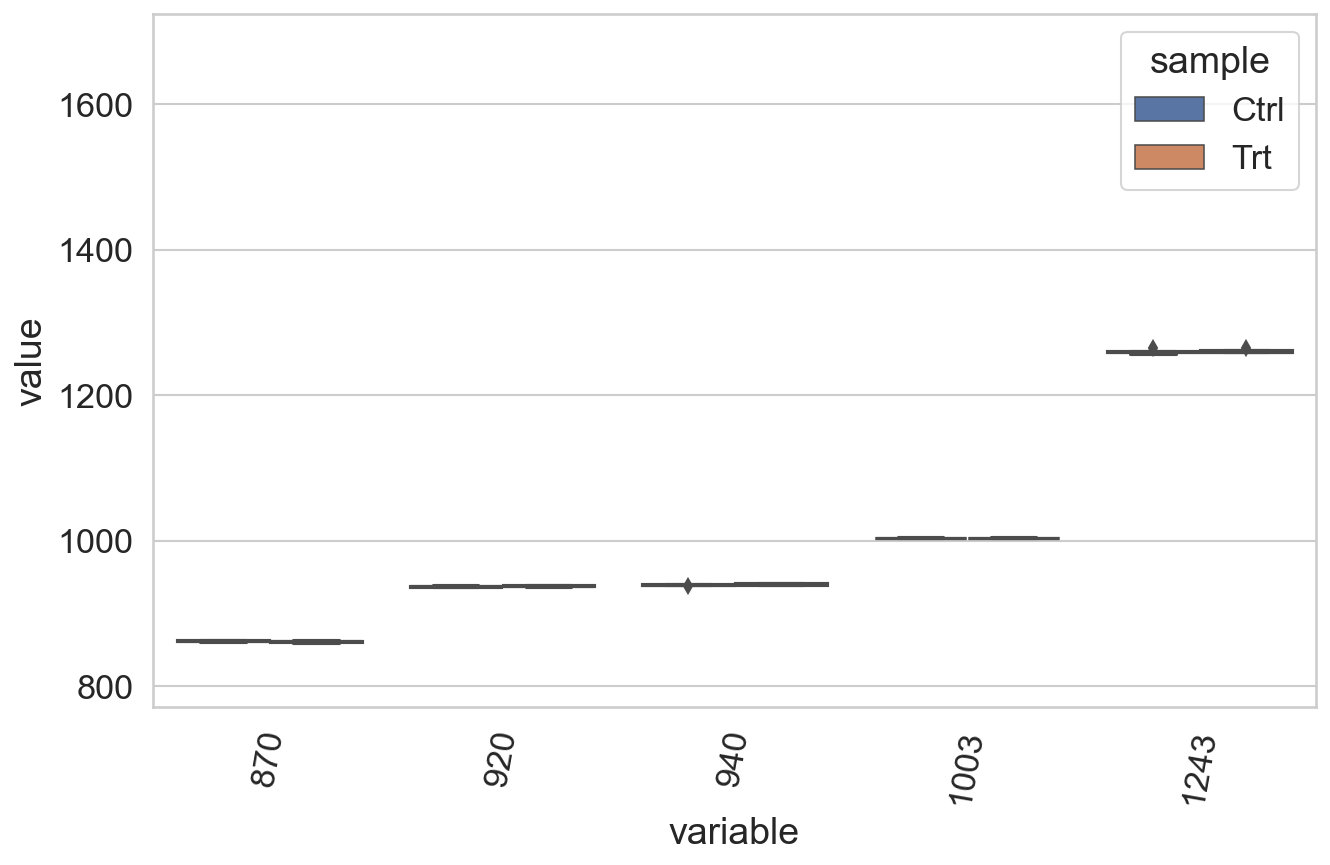

In [ ]:
plt.figure(figsize=(10, 6), dpi = 150)
sns.boxplot(
    data = pk_df_long[(pk_df_long['trt_time']=='60mins') & (pk_df_long['orient'] == 'Para')], #& (pk_df_long['value'] <= 1000)
    x = 'variable',
    y = 'value',
    hue = 'sample'
)
plt.xticks(rotation = 80, ha = 'center');
#plt.ylim([750, 1000])
plt.xlim([1.5, 6.5])
#plt.yscale('log')

In [ ]:
peak_df[peak_df['trt_time'].str.contains('40min')].groupby(['orient', 'sample', 'trt_time', ]).mean().T

orient           Orth                                   Para               \
sample           Ctrl          Trt                      Ctrl          Trt   
trt_time       40mins     40min24h       40mins       40mins     40min24h   
815        816.804381   816.563346   816.609774   816.278348   816.144289   
855        861.622695   862.275208   861.803544   861.688279   862.411929   
870        861.889024   862.590991   862.086362   862.036525   862.926651   
920        940.642847   941.067073   940.650390   937.645060   938.092201   
940        943.570676   944.258918   944.054538   939.688746   940.583653   
1003      1004.041548  1004.648354  1004.942264  1004.099780  1004.112569   
1243      1249.306558  1249.654966  1249.036502  1253.512056  1250.376210   
1270      1248.111049  1248.423722  1247.603316  1250.234213  1247.851685   
1635      1658.297104  1665.796565  1659.704448  1666.972275  1666.644914   
1664      1655.738611  1657.310572  1655.366517  1659.475308  1658.461803   

orient                 
sample                 
trt_time       40mins  
815        814.843293  
855        861.797246  
870        864.757332  
920        958.414650  
940        941.741933  
1003      1004.188243  
1243      1253.831503  
1270      1248.904201  
1635      1660.778876  
1664      1655.230780

In [ ]:
peak_df[peak_df['trt_time'].str.contains('40min')].groupby(['orient', 'sample', 'trt_time', ]).std().T

orient        Orth                           Para                     
sample        Ctrl        Trt                Ctrl       Trt           
trt_time    40mins   40min24h    40mins    40mins  40min24h     40mins
815       0.831561   0.718519  0.370262  0.856690  0.972179   0.587263
855       0.417529   0.530467  0.626488  0.479184  0.785558   2.555183
870       0.428207   0.532434  0.640017  0.440770  0.748126   2.633467
920       0.251293   0.354286  0.394522  0.757044  0.853696  38.445362
940       0.267790   0.661286  0.724757  1.180381  0.943471   1.740181
1003      0.225123   0.212941  0.408837  0.609662  0.621698   0.489209
1243      0.829802   1.024121  1.921785  4.047067  4.092104   2.550683
1270      0.759544   1.164644  1.354776  5.165078  3.988400   6.259209
1635      1.251744  10.750723  5.233817  5.083828  5.099413   5.802407
1664      1.651004   3.429258  2.315953  1.546017  1.624706   2.289529


📊 Mean Peak Positions:
peak_762      772.694497
peak_783             NaN
peak_815      816.329893
peak_855      862.034270
peak_870      862.215752
peak_920      939.798578
peak_940      942.328306
peak_970      929.305070
peak_1003    1003.490011
peak_1034    1043.539497
peak_1053    1048.780986
peak_1062    1040.550634
peak_1096    1055.812412
peak_1128            NaN
peak_1166    1176.534303
peak_1205    1243.894419
peak_1223    1246.458419
peak_1243    1248.703954
peak_1270    1247.220978
peak_1322    1344.800068
peak_1343    1350.266217
peak_1374    1345.057431
peak_1395    1461.251359
peak_1425    1895.793348
peak_1439    1442.778238
peak_1450    1444.797587
peak_1488    1443.897562
peak_1635    1659.988910
peak_1664    1656.130357
dtype: float64
peak_762       1.876759
peak_783            NaN
peak_815       0.574886
peak_855       0.578647
peak_870       0.599265
peak_920       2.056230
peak_940       2.631395
peak_970       4.356921
peak_1003           NaN
peak_1034     17.133

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_19376\83694754.py:81: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\oadeji01\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


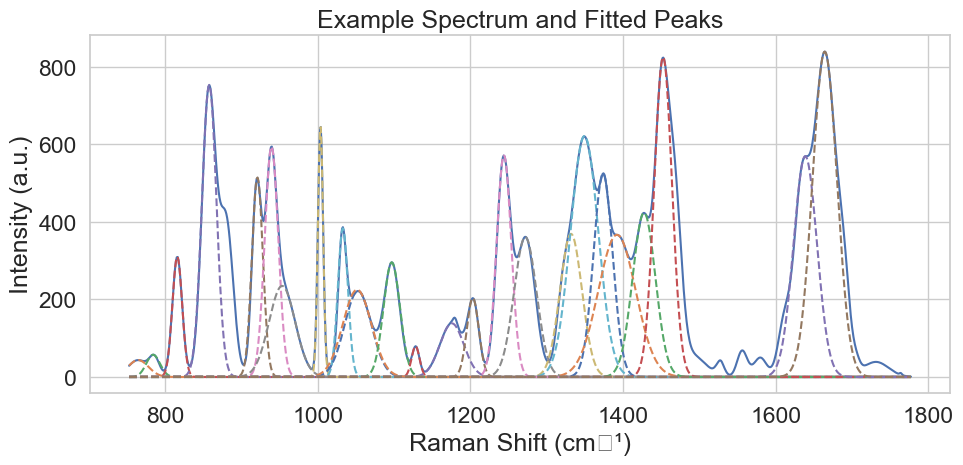

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# -----------------------------
# Define a Gaussian function
# -----------------------------
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# -----------------------------
# Simulate or Load Spectra
# -----------------------------

x = df.iloc[:, 4:].columns.astype('float64').to_numpy()
spectra = df[(df['sample'] == 'Ctrl') & (df['trt_time'] == '2mins') & (df['orient'] == 'Orth')].iloc[:, 4:].to_numpy()
fit_window = 40
true_peaks = [762, 783, 815, 855, 870, 920, 940, 970, 
              1003, 1034, 1053,  1062, 1096, 1128, 1166, 
              1205, 1223, 1243, 1270, 1322, 1343, 1374, 
              1395, 1425, 1439, 1450, 1488, 1635, 1664]  # Expected peak regions (center positions)


# -----------------------------
# Peak Fitting Function
# -----------------------------
def fit_peak(x, y, center_guess, window=5):
    # Crop data around the peak
    mask = (x > center_guess - window) & (x < center_guess + window)
    x_crop = x[mask]
    y_crop = y[mask]

    if len(x_crop) < 5:
        return None
    
    try:
        # Initial guess: amplitude, center, width
        p0 = [np.max(y_crop), center_guess, 10]
        popt, _ = curve_fit(gaussian, x_crop, y_crop, p0=p0)
        return popt  # a, x0, sigma
    except RuntimeError:
        return None

# -----------------------------
# Fit All Spectra
# -----------------------------
results = {f"peak_{pk}": [] for pk in true_peaks}

for y in spectra:
    for pk in true_peaks:
        fit = fit_peak(x, y, pk, window = fit_window)
        if fit is not None:
            results[f"peak_{pk}"].append(fit[1])  # x0 (peak position)
        else:
            results[f"peak_{pk}"].append(np.nan)

# -----------------------------
# Output Mean Peak Positions
# -----------------------------
df_peak = pd.DataFrame(results)
mean_positions = df_peak.mean()
position_std = df_peak.std()
''print("\n📊 Mean Peak Positions:")
print(mean_positions)
print(position_std)''

peak_pos = pd.DataFrame(mean_positions, columns = ['mean'])
peak_pos.insert(1, 'std', position_std)


# -----------------------------
# Plot Example Fit
# -----------------------------
plt.figure(figsize=(10, 5))
y_example = spectra[0]
plt.plot(x, y_example, label='Spectrum')
for pk in true_peaks:
    fit = fit_peak(x, y_example, pk)
    if fit is not None:
        plt.plot(x, gaussian(x, *fit), '--', label=f'Fit near {pk} cm⁻¹')
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Example Spectrum and Fitted Peaks')
#plt.legend()
plt.tight_layout()
plt.show()         
            






ValueError: x and y must have same first dimension, but have shapes (1,) and (1024,)

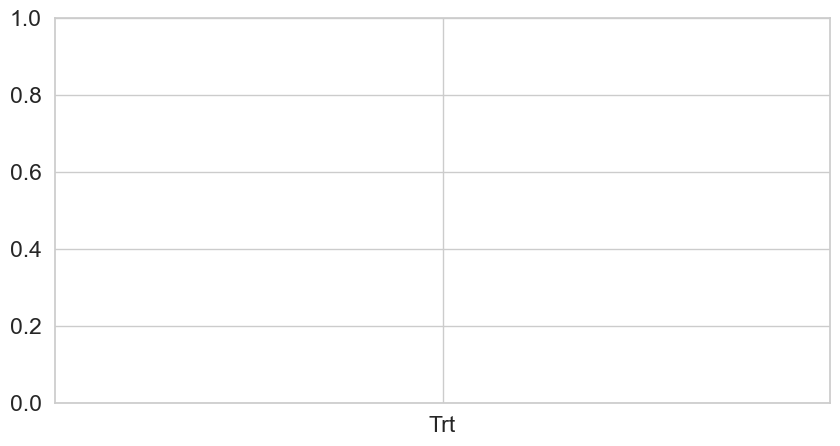

In [ ]:
# -----------------------------
# Plot Example Fit
# -----------------------------
plt.figure(figsize=(10, 5))
y_example = spectra[0]
plt.plot(x, y_example, label='Spectrum')
for pk in true_peaks:
    fit = fit_peak(x, y_example, pk)
    if fit is not None:
        plt.plot(x, gaussian(x, *fit), '--', label=f'Fit near {pk} cm⁻¹')
plt.xlabel('Raman Shift (cm⁻¹)')
plt.ylabel('Intensity (a.u.)')
plt.title('Example Spectrum and Fitted Peaks')
#plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------
# Export Mean Peak Positions to CSV
# -----------------------------
mean_positions.to_csv("mean_peak_positions.csv", header=["Mean Position (cm⁻¹)"])
position_std.to_csv("peak_position_std.csv")
#print("\n✅ Mean peak positions saved to 'mean_peak_positions.csv'")

In [ ]:
peak_pos = pd.DataFrame(mean_positions, columns = ['mean'])
peak_pos.insert(1, 'std', position_std)


<ErrorbarContainer object of 3 artists>

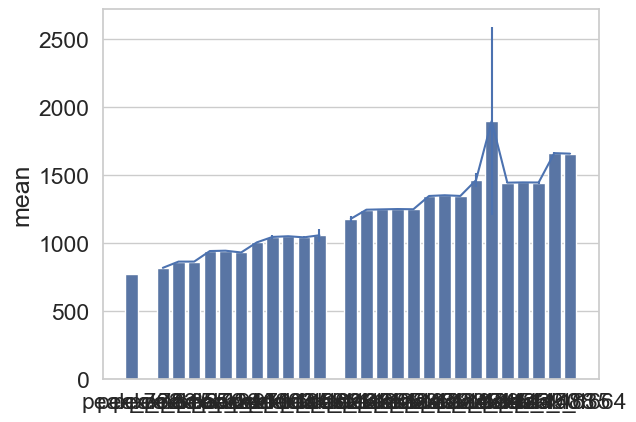

In [ ]:
sns.barplot(
    data = peak_pos,
    x = peak_pos.index.to_numpy(),
    y = 'mean'
)
plt.errorbar(
    x = peak_pos.index.to_numpy(),
    y = peak_pos['mean'],
    yerr=peak_pos['std']
)

<Axes: ylabel='mean'>

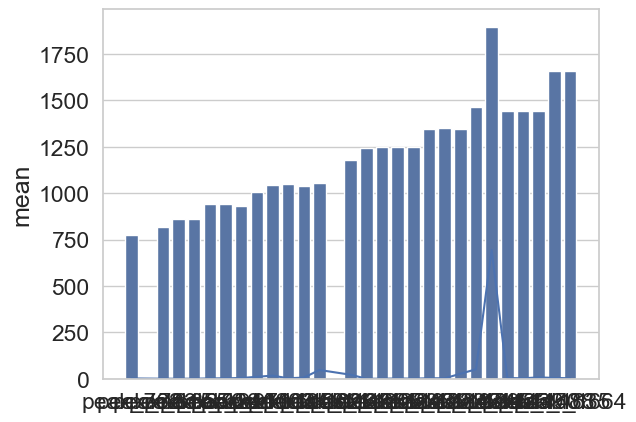

In [ ]:
sns.barplot(
    data = peak_pos,
    x = peak_pos.index.to_numpy(),
    y = 'mean'
)
sns.lineplot(
    data = peak_pos,
    x = peak_pos.index.to_numpy(),
    y = 'std'
)

In [ ]:
peak_pos#.index

mean         std
peak_762    772.694497    1.876759
peak_783           NaN         NaN
peak_815    816.329893    0.574886
peak_855    862.034270    0.578647
peak_870    862.215752    0.599265
peak_920    939.798578    2.056230
peak_940    942.328306    2.631395
peak_970    929.305070    4.356921
peak_1003  1003.490011         NaN
peak_1034  1043.539497   17.133862
peak_1053  1048.780986    3.082164
peak_1062  1040.550634    6.314975
peak_1096  1055.812412   47.432443
peak_1128          NaN         NaN
peak_1166  1176.534303   21.859388
peak_1205  1243.894419    0.361306
peak_1223  1246.458419    0.376136
peak_1243  1248.703954    1.951388
peak_1270  1247.220978    0.808678
peak_1322  1344.800068    2.994472
peak_1343  1350.266217    2.737010
peak_1374  1345.057431         NaN
peak_1395  1461.251359   51.421093
peak_1425  1895.793348  693.495064
peak_1439  1442.778238    4.234956
peak_1450  1444.797587    2.769016
peak_1488  1443.897562    7.605799
peak_1635  1659.988910    4.728409
peak_1664  1656.130357    3.032034